# 1. 데이터 확인

In [4]:
!pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn openpyxl xlsxwriter ipython jupyter notebook ipynbname win10toast plyer

  Using cached xlsxwriter-3.2.5-py3-none-any.whl.metadata (2.7 kB)
  Using cached ipynbname-2024.1.0.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached win10toast-0.9-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached plyer-2.1.0-py2.py3-none-any.whl.metadata (61 kB)
  Using cached pypiwin32-223-py3-none-any.whl.metadata (236 bytes)
INFO: pip is looking at multiple versions of pypiwin32 to determine which version is compatible with other requirements. This could take a while.
  Using cached pypiwin32-219.zip (4.8 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/_s/3rndymjx4pv6gq6z87t71r200000gn/T/pip-install-po9rtsl_/pypiwin32_e2eb44ca42bf4c7d846b5f8ff47a2036/setup.py",

In [5]:
import subprocess
import shutil
import re
import subprocess      # ← 이 줄 반드시 추가
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
# 그래프 한글폰트 깨짐 방지 (선택)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기준
plt.rcParams['axes.unicode_minus'] = False
print("📊 패키지 불러오기 완료!")

📊 패키지 불러오기 완료!


In [6]:
import pandas as pd
url = "https://raw.githubusercontent.com/delic1758/K-Frailty/main/data/K-Frailty.csv"
df = pd.read_csv(url)
df.head()

C:\Users\SM\AppData\Local\Temp\ipykernel_17640\4187022785.py:3: DtypeWarning: Columns (311,428,490,491,492,493,494,495,496,497,498,499) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,PID,seqNo,surveyNoR,ANS_TYPE,ANS_SUB1,ANS_SUB2,ANS2_TYPE,ANS2_SUB,A11_1,A11_2,...,T나이_3,T혼인상태,THTYPE,T교육수준,T취업여부,TJ3K13H_3_1,TR가구원수,T가구주와의관계코드,TJ3K13H_3_2,Z_MC7_1
0,159330$1,159330,39005,0,,,2,,1,1,...,4,2,1,2,2,2,1,1,2,2
1,159313$1,159313,39005,0,,,2,,1,1,...,3,2,1,4,2,1,1,1,1,2
2,159329$1,159329,39005,0,,,2,,1,1,...,1,2,1,3,1,3,1,1,2,2
3,159335$1,159335,39005,0,,,2,,1,1,...,5,2,1,4,2,3,1,1,2,2
4,159425$1,159425,39006,0,,,1,2,3,2,...,2,1,3,4,2,3,3,1,2,1


In [7]:
print("✅ 데이터 기본 정보")
print("-" * 50)
print(f"🔹 행 개수: {df.shape[0]}")
print(f"🔹 열 개수: {df.shape[1]}")
print("\n🔹 열별 결측값 개수 (상위 20개)")
print(df.isnull().sum().sort_values(ascending=False).head(20))
# 숫자형 변수만 확인
print("\n🔹 숫자형 변수에서 상위 값 분포")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    print(f"\n▶ {col}")
    print(df[col].value_counts().head(3))
# 문자형 변수에서 상위 값 분포
print("\n🔹 문자형 변수에서 상위 값 분포")
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    print(f"\n▶ {col}")
    print(df[col].value_counts().head(3))
print("\n🔹 열별 데이터 타입")
print(df.dtypes.value_counts())
print(df.dtypes.head(10))  # 상위 10개만 미리 보기
print("\n🔹 기본 통계 요약 (숫자형)")
print(df.describe().T.head(10))  # 상위 10개 요약

✅ 데이터 기본 정보
--------------------------------------------------
🔹 행 개수: 10078
🔹 열 개수: 784

🔹 열별 결측값 개수 (상위 20개)
Q5        0
Q4        0
Q3        0
Q2        0
Q1        0
J6b_4     0
J6a_4     0
J6b_3     0
J6a_3     0
J6b_2     0
J6a_2     0
J6b_1     0
J6a_1     0
J5        0
J4_1      0
J4        0
A5_1      0
A4_2_1    0
A3_1      0
A2_2_1    0
dtype: int64

🔹 숫자형 변수에서 상위 값 분포

▶ seqNo
seqNo
121515    3
109922    3
110418    3
Name: count, dtype: int64

▶ surveyNoR
surveyNoR
37033    20
37034    19
11117    19
Name: count, dtype: int64

▶ ANS_TYPE
ANS_TYPE
0    9951
1      96
2      31
Name: count, dtype: int64

▶ ANS2_TYPE
ANS2_TYPE
2    8473
1    1605
Name: count, dtype: int64

▶ A11_1
A11_1
2    5915
1    3448
3     535
Name: count, dtype: int64

▶ A11_2
A11_2
2    5656
1    4329
3      93
Name: count, dtype: int64

▶ A11_3
A11_3
1    5057
2    4952
3      69
Name: count, dtype: int64

▶ HTYPE
HTYPE
3     5203
1     3448
11     582
Name: count, dtype: int64

▶ S6_1
S6_1
0    910

In [8]:
# 이상치 확인
for col in df.columns:
    try:
        print(f"\n▶ {col}")
        print(df[col].value_counts(dropna=False).head(10))
    except Exception as e:
        print(f"⚠️ {col} 처리 중 오류 발생: {e}")


▶ PID
PID
130676$1    1
159330$1    1
159313$1    1
159329$1    1
159335$1    1
159425$1    1
159450$1    1
159436$1    1
159430$1    1
159393$1    1
Name: count, dtype: int64

▶ seqNo
seqNo
121515    3
109922    3
110418    3
154915    3
130402    3
158294    3
158629    3
114465    3
129129    3
143030    3
Name: count, dtype: int64

▶ surveyNoR
surveyNoR
37033    20
37034    19
11117    19
37014    19
31004    18
11114    18
38034    17
33018    17
32022    17
37040    17
Name: count, dtype: int64

▶ ANS_TYPE
ANS_TYPE
0    9951
1      96
2      31
Name: count, dtype: int64

▶ ANS_SUB1
ANS_SUB1
      9951
2       61
11      29
12      13
15      11
17       6
13       2
34       1
53       1
16       1
Name: count, dtype: int64

▶ ANS_SUB2
ANS_SUB2
     9951
2      44
5      39
1      21
3      18
4       5
Name: count, dtype: int64

▶ ANS2_TYPE
ANS2_TYPE
2    8473
1    1605
Name: count, dtype: int64

▶ ANS2_SUB
ANS2_SUB
      8473
2     1549
11      11
15       7
32       5
34     

# 2. 데이터 전처리

## 1) 변수 추출 (10078, 129)

In [9]:
# 사용할 변수 리스트
used_vars = [
    'PID', 'C3', 'C4', 'C5', 'B3_2L_1', 'B3_2L_2', 'B3_2L_4', 'B3_2L_5', 'B3_2L_6', 'B3_2L_7', 'B3_2L_9',
    'B3_2L_13', 'B3_2L_14', 'B3_2L_25', 'B3_2L_29', 'RES_SEX', 'RES_AGE', 'RES_MAR', 'RES_EDU1',
    'RES_EMP', 'B1', 'B2', 'B3C', 'B3_2L_3', 'B3_2L_8', 'B3_2L_10', 'B3_2L_11', 'B3_2L_12',
    'B3_2L_15', 'B3_2L_16', 'B3_2L_17', 'B3_2L_18', 'B3_2L_19', 'B3_2L_20', 'B3_2L_21',
    'B3_2L_22', 'B3_2L_23', 'B3_2L_24', 'B3_2L_26', 'B3_2L_27', 'B3_2L_28', 'B3_2L_30',
    'B3_2L_31', 'B3_2L_32', 'B3_2L_33', 'B4', 'B5', 'B7_1', 'B7_2', 'B7_3', 'B8_1', 'B8_2', 'B8_3', 'B8_4',
    'B8_5', 'B8_6', 'B8_7', 'B8_8', 'B8_9', 'B8_10', 'B8_11', 'B8_12', 'B8_13', 'B8_14', 'B8_15',
    'B9', 'B10', 'B11', 'B12', 'B13_1', 'B13_2', 'B13_6', 'B13_9', 'B13_10', 'B13_11', 'B16_1',
    'B16_2', 'B17_1', 'C6', 'C7_1', 'C7_2', 'C7_3', 'C7_4', 'C7_5', 'C7_6', 'C7_7', 'C8_1_1',
    'C8_1_2', 'C8_1_3', 'C8_1_4', 'C8_1_5', 'C8_1_6', 'C8_1_7', 'C8_2_8', 'C8_2_9', 'C8_2_10',
    'C9', 'C10', 'C10_1', 'C11', 'D10', 'D11_1_1', 'D11_1_2', 'D11_1_3', 'D11_2_1', 'D11_2_2',
    'D11_2_3', 'D13', 'E1', 'H1', 'H2', 'H9', 'H11', 'QIK2', 'J2', 'J3b_1_13', 'J3b_3_13', 'J4',
    'J4_1', 'TQIK2_1.5sd', 'TareaUMD_2', 'TSIDO', 'T나이_3', 'THTYPE', 'TJ3K13H_3_1', 'TR가구원수',
    'T가구주와의관계코드', 'TJ3K13H_3_2', 'Z_MC7_1']
# 선택된 변수만 추출
df_selected = df[used_vars]
print(df_selected.shape)     
print(df_selected.info())
print(df_selected.head())
print(df_selected.columns.tolist())

(10078, 129)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10078 entries, 0 to 10077
Columns: 129 entries, PID to Z_MC7_1
dtypes: int64(126), object(3)
memory usage: 9.9+ MB
None
        PID  C3  C4  C5  B3_2L_1  B3_2L_2  B3_2L_4  B3_2L_5  B3_2L_6  B3_2L_7  \
0  159330$1   4   2   2        1        2        2        2        2        2   
1  159313$1   3   2   2        2        2        2        2        2        1   
2  159329$1   3   2   2        1        2        2        2        2        2   
3  159335$1   4   1   1        2        2        2        2        2        2   
4  159425$1   2   1   1        2        1        2        2        2        2   

   ...  TQIK2_1.5sd  TareaUMD_2  TSIDO  T나이_3  THTYPE  TJ3K13H_3_1  TR가구원수  \
0  ...            2           1     39      4       1            2       1   
1  ...            2           1     39      3       1            1       1   
2  ...            1           1     39      1       1            3       1   
3  ...            

## 2) 변수 생성 (10078, 134)

In [10]:
# 🔸 1. Frailty_Chronic_Score (5개 이상 만성질환 여부 → 1점)
frailty_vars = ['B3_2L_1', 'B3_2L_2', 'B3_2L_4', 'B3_2L_5', 'B3_2L_6', 'B3_2L_7',
                'B3_2L_9', 'B3_2L_13', 'B3_2L_14', 'B3_2L_25', 'B3_2L_29']
df_selected['Frailty_Chronic_Score'] = (
    df_selected[frailty_vars].apply(lambda row: (row == 1).sum(), axis=1) >= 5
).astype(int)
# 🔸 2. Weight_Change_1y (6개월간 체중감소 5% 이상 → 1점) - > 여기서는 12개월
# B7_3(12개월 전 체중)이 used_vars에 없으면 used_vars에 추가 필요
# 12개월 전 체중(B7_3) 대비 현재 체중(B7_1) 감소가 5% 이상일 때만 1
df_selected['Weight_Change_1y'] = ((df_selected['B7_3'] - df_selected['B7_1']) / df_selected['B7_3'] >= 0.05).astype(int)
# 🔸 3. Depression_Score_15 (긍정/부정형 반영 점수 합산)
df_selected['Depression_Score_15'] = (
    (df_selected['B8_1'] == 2).astype(int) + (df_selected['B8_2'] == 1).astype(int) +
    (df_selected['B8_3'] == 1).astype(int) + (df_selected['B8_4'] == 1).astype(int) +
    (df_selected['B8_5'] == 2).astype(int) + (df_selected['B8_6'] == 1).astype(int) +
    (df_selected['B8_7'] == 2).astype(int) + (df_selected['B8_8'] == 1).astype(int) +
    (df_selected['B8_9'] == 1).astype(int) + (df_selected['B8_10'] == 1).astype(int) +
    (df_selected['B8_11'] == 2).astype(int) + (df_selected['B8_12'] == 1).astype(int) +
    (df_selected['B8_13'] == 2).astype(int) + (df_selected['B8_14'] == 1).astype(int) +
    (df_selected['B8_15'] == 1).astype(int))
# 🔸 4. ADL_Score_14 (1=2점, 2=1점, 3=0점 환산 총합)
adl_vars = ['C7_1', 'C7_2', 'C7_3', 'C7_4', 'C7_5', 'C7_6', 'C7_7']
df_selected['ADL_Score_14'] = df_selected[adl_vars].apply(
    lambda row: ((row == 1)*2 + (row == 2)*1).sum(), axis=1)
# 🔸 5. IADL_Score_20 (1=2점, 2=1점, 3=0점 환산 총합)
iadl_vars = ['C8_1_1', 'C8_1_2', 'C8_1_3', 'C8_1_4', 'C8_1_5', 'C8_1_6', 'C8_1_7',
             'C8_2_8', 'C8_2_9', 'C8_2_10']
df_selected['IADL_Score_20'] = df_selected[iadl_vars].apply(
    lambda row: ((row == 1)*2 + (row == 2)*1).sum(), axis=1)
# ✅ 생성된 변수 확인
print(df_selected[['Frailty_Chronic_Score', 'Weight_Change_1y', 'Depression_Score_15',
                   'ADL_Score_14', 'IADL_Score_20']].describe())
print(df_selected.shape)               # 행, 열 개수
print(df_selected.columns.tolist())    # 모든 컬럼명(순서대로)
print(df_selected.head())              # 데이터 앞부분 5개 행

C:\Users\SM\AppData\Local\Temp\ipykernel_17640\4019728719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Frailty_Chronic_Score'] = (
C:\Users\SM\AppData\Local\Temp\ipykernel_17640\4019728719.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Weight_Change_1y'] = ((df_selected['B7_3'] - df_selected['B7_1']) / df_selected['B7_3'] >= 0.05).astype(int)
C:\Users\SM\AppData\Local\Temp\ipykernel_17640\4019728719.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

       Frailty_Chronic_Score  Weight_Change_1y  Depression_Score_15  \
count           10078.000000      10078.000000         10078.000000   
mean                0.002878          0.040683             3.055070   
std                 0.053568          0.197564             3.233226   
min                 0.000000          0.000000             0.000000   
25%                 0.000000          0.000000             0.000000   
50%                 0.000000          0.000000             2.000000   
75%                 0.000000          0.000000             5.000000   
max                 1.000000          1.000000            15.000000   

       ADL_Score_14  IADL_Score_20  
count  10078.000000   10078.000000  
mean      13.767116      19.168684  
std        1.126530       2.633161  
min        0.000000       0.000000  
25%       14.000000      20.000000  
50%       14.000000      20.000000  
75%       14.000000      20.000000  
max       14.000000      20.000000  
(10078, 134)
['PID', 'C3', 

C:\Users\SM\AppData\Local\Temp\ipykernel_17640\4019728719.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['IADL_Score_20'] = df_selected[iadl_vars].apply(


### 노쇠 변수 생성 (10078, 138)

In [11]:
chronic_vars = ['B3_2L_1', 'B3_2L_2', 'B3_2L_4', 'B3_2L_5', 'B3_2L_6',
    'B3_2L_7', 'B3_2L_9', 'B3_2L_13', 'B3_2L_14', 'B3_2L_25', 'B3_2L_29']
# 1. 만성질환 5개 이상 보유
df_selected.loc[:, 'Frailty_Chronic_Score'] = (df_selected[chronic_vars] == 1).sum(axis=1)
df_selected.loc[:, 'Frailty_Chronic_Score'] = (df_selected['Frailty_Chronic_Score'] >= 5).astype(int)
# 2. 1년간 5% 체중감소 여부
df_selected.loc[:, 'Weight_Change_1y'] = (
    ((df_selected['B7_3'] - df_selected['B7_1']) / df_selected['B7_3'] >= 0.05) & (df_selected['B7_3'] > 0)
).astype(int)
# 3. C3: 피로 ('항상 그렇다'==1, '거의 대부분 그렇다'==2 → 1점)
df_selected.loc[:, 'Frailty_Fatigue'] = df_selected['C3'].isin([1, 2]).astype(int)
# 4. C4: 계단 오르기 어려움 (1.예=1점)
df_selected.loc[:, 'Frailty_Stair'] = (df_selected['C4'] == 1).astype(int)
# 5. C5: 300m 걷기 어려움 (1.예=1점)
df_selected.loc[:, 'Frailty_Walk'] = (df_selected['C5'] == 1).astype(int)
# 6. 노쇠 점수 합산 (0~5점)
df_selected.loc[:, 'Frailty_Score'] = (
    df_selected['Frailty_Fatigue'] +
    df_selected['Frailty_Stair'] +
    df_selected['Frailty_Walk'] +
    df_selected['Frailty_Chronic_Score'] +
    df_selected['Weight_Change_1y'])
# 결과 요약 확인
print(df_selected[['Frailty_Fatigue', 'Frailty_Stair', 'Frailty_Walk', 'Frailty_Chronic_Score', 'Weight_Change_1y', 'Frailty_Score']].describe())
print(df_selected['Frailty_Score'].value_counts())

print(df_selected.shape)               # 행, 열 개수
print(df_selected.columns.tolist())    # 모든 컬럼명(순서대로)
print(df_selected.head())              # 데이터 앞부분 5개 행


       Frailty_Fatigue  Frailty_Stair  Frailty_Walk  Frailty_Chronic_Score  \
count     10078.000000   10078.000000  10078.000000           10078.000000   
mean          0.090693       0.295396      0.215122               0.002878   
std           0.287186       0.456243      0.410927               0.053568   
min           0.000000       0.000000      0.000000               0.000000   
25%           0.000000       0.000000      0.000000               0.000000   
50%           0.000000       0.000000      0.000000               0.000000   
75%           0.000000       1.000000      0.000000               0.000000   
max           1.000000       1.000000      1.000000               1.000000   

       Weight_Change_1y  Frailty_Score  
count      10078.000000   10078.000000  
mean           0.040683       0.644771  
std            0.197564       0.938639  
min            0.000000       0.000000  
25%            0.000000       0.000000  
50%            0.000000       0.000000  
75%       

C:\Users\SM\AppData\Local\Temp\ipykernel_17640\3246064687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Frailty_Fatigue'] = df_selected['C3'].isin([1, 2]).astype(int)
C:\Users\SM\AppData\Local\Temp\ipykernel_17640\3246064687.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Frailty_Stair'] = (df_selected['C4'] == 1).astype(int)
C:\Users\SM\AppData\Local\Temp\ipykernel_17640\3246064687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

## 노쇠군 그룹(Frailty_Group) 변수 생성 (10078, 139)

In [12]:
def assign_frailty_group_eng(score):
    if score == 0:
        return 'Robust'
    elif score in [1, 2]:
        return 'Prefrail'
    else:
        return 'Frail'
df_selected['Frailty_Group'] = df_selected['Frailty_Score'].apply(assign_frailty_group_eng)
print(df_selected['Frailty_Group'].value_counts())
print(df_selected.shape)
print(df_selected.columns.tolist())
print(df_selected.head())

Frailty_Group
Robust      6269
Prefrail    3309
Frail        500
Name: count, dtype: int64
(10078, 139)
['PID', 'C3', 'C4', 'C5', 'B3_2L_1', 'B3_2L_2', 'B3_2L_4', 'B3_2L_5', 'B3_2L_6', 'B3_2L_7', 'B3_2L_9', 'B3_2L_13', 'B3_2L_14', 'B3_2L_25', 'B3_2L_29', 'RES_SEX', 'RES_AGE', 'RES_MAR', 'RES_EDU1', 'RES_EMP', 'B1', 'B2', 'B3C', 'B3_2L_3', 'B3_2L_8', 'B3_2L_10', 'B3_2L_11', 'B3_2L_12', 'B3_2L_15', 'B3_2L_16', 'B3_2L_17', 'B3_2L_18', 'B3_2L_19', 'B3_2L_20', 'B3_2L_21', 'B3_2L_22', 'B3_2L_23', 'B3_2L_24', 'B3_2L_26', 'B3_2L_27', 'B3_2L_28', 'B3_2L_30', 'B3_2L_31', 'B3_2L_32', 'B3_2L_33', 'B4', 'B5', 'B7_1', 'B7_2', 'B7_3', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'B8_8', 'B8_9', 'B8_10', 'B8_11', 'B8_12', 'B8_13', 'B8_14', 'B8_15', 'B9', 'B10', 'B11', 'B12', 'B13_1', 'B13_2', 'B13_6', 'B13_9', 'B13_10', 'B13_11', 'B16_1', 'B16_2', 'B17_1', 'C6', 'C7_1', 'C7_2', 'C7_3', 'C7_4', 'C7_5', 'C7_6', 'C7_7', 'C8_1_1', 'C8_1_2', 'C8_1_3', 'C8_1_4', 'C8_1_5', 'C8_1_6', 'C8_1_7', 'C8_

C:\Users\SM\AppData\Local\Temp\ipykernel_17640\1978803783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Frailty_Group'] = df_selected['Frailty_Score'].apply(assign_frailty_group_eng)


### 나이 변수 라벨링 (10078, 139)

In [13]:
age_map = {1: '65-69', 2: '70-74', 3: '75-79', 4: '80-84', 5: '85-89', 6: '90+'}
# 공백 제거 후 매핑 적용 (혹시 모를 문자열 숫자 대응도 포함)
df_selected['T나이_3'] = df_selected['T나이_3'].astype(str).str.strip().astype(int)
# ✅ 예시 10건 확인
print(df_selected[['T나이_3']].head(10))
# ✅ 연령 구간별 빈도 확인
print(df_selected['T나이_3'].value_counts().sort_index())
print(df_selected.shape)               # 행, 열 개수
print(df_selected.columns.tolist())    # 모든 컬럼명(순서대로)
print(df_selected.head())              # 데이터 앞부분 5개 행

   T나이_3
0      4
1      3
2      1
3      5
4      2
5      5
6      4
7      4
8      1
9      1
T나이_3
1    3249
2    2482
3    1950
4    1544
5     668
6     185
Name: count, dtype: int64
(10078, 139)
['PID', 'C3', 'C4', 'C5', 'B3_2L_1', 'B3_2L_2', 'B3_2L_4', 'B3_2L_5', 'B3_2L_6', 'B3_2L_7', 'B3_2L_9', 'B3_2L_13', 'B3_2L_14', 'B3_2L_25', 'B3_2L_29', 'RES_SEX', 'RES_AGE', 'RES_MAR', 'RES_EDU1', 'RES_EMP', 'B1', 'B2', 'B3C', 'B3_2L_3', 'B3_2L_8', 'B3_2L_10', 'B3_2L_11', 'B3_2L_12', 'B3_2L_15', 'B3_2L_16', 'B3_2L_17', 'B3_2L_18', 'B3_2L_19', 'B3_2L_20', 'B3_2L_21', 'B3_2L_22', 'B3_2L_23', 'B3_2L_24', 'B3_2L_26', 'B3_2L_27', 'B3_2L_28', 'B3_2L_30', 'B3_2L_31', 'B3_2L_32', 'B3_2L_33', 'B4', 'B5', 'B7_1', 'B7_2', 'B7_3', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'B8_8', 'B8_9', 'B8_10', 'B8_11', 'B8_12', 'B8_13', 'B8_14', 'B8_15', 'B9', 'B10', 'B11', 'B12', 'B13_1', 'B13_2', 'B13_6', 'B13_9', 'B13_10', 'B13_11', 'B16_1', 'B16_2', 'B17_1', 'C6', 'C7_1', 'C7_2', 'C7_3', 'C7_4'

C:\Users\SM\AppData\Local\Temp\ipykernel_17640\1920095317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['T나이_3'] = df_selected['T나이_3'].astype(str).str.strip().astype(int)


## 교차표. 노쇠 분포 확인

         Frailn(%) Prefrailn(%)    Robustn(%)    전체n(100%)
T나이_3                                                     
1        46 (1.4%)  646 (19.9%)  2557 (78.7%)  3249 (100%)
2        77 (3.1%)  668 (26.9%)  1737 (70.0%)  2482 (100%)
3       116 (5.9%)  761 (39.0%)  1073 (55.0%)  1950 (100%)
4      154 (10.0%)  737 (47.7%)   653 (42.3%)  1544 (100%)
5       79 (11.8%)  381 (57.0%)   208 (31.1%)   668 (100%)
6       28 (15.1%)  116 (62.7%)    41 (22.2%)   185 (100%)


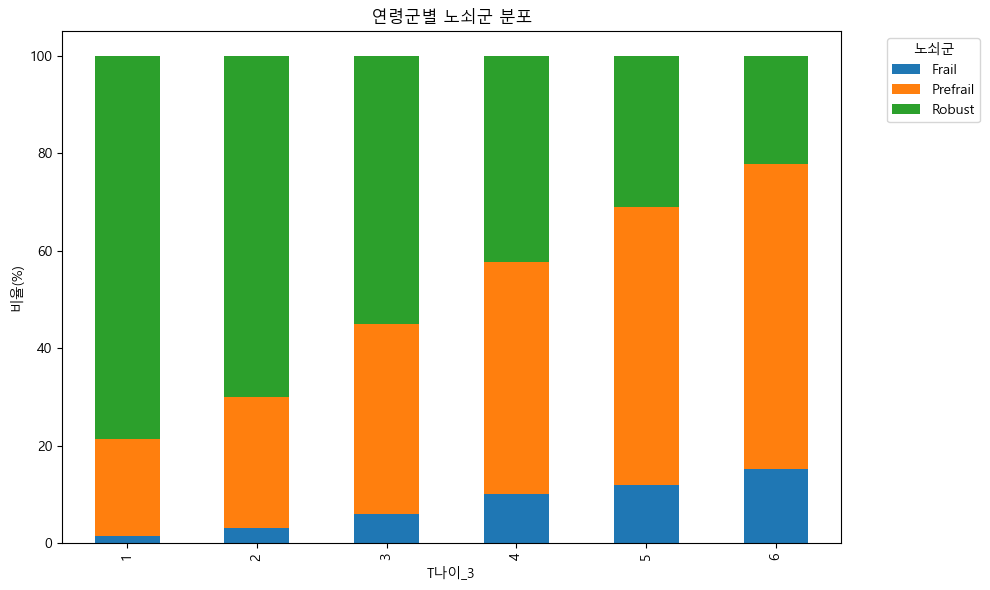

In [14]:
# 교차표 (df → df_selected)
cross = pd.crosstab(df_selected['T나이_3'], df_selected['Frailty_Group'])
cross_sum = cross.sum(axis=1)  # 각 연령군 n
# % 계산 (가로방향, 즉 연령군 내에서 100%)
cross_pct = cross.div(cross_sum, axis=0) * 100
# 표 생성
result = pd.DataFrame(index=cross.index)
for col in cross.columns:
    result[f"{col}n(%)"] = [
        f"{n} ({pct:.1f}%)" for n, pct in zip(cross[col], cross_pct[col])    ]
# 전체n(100%) 열 추가
result['전체n(100%)'] = [f"{n} (100%)" for n in cross_sum]
# 결과 출력
print(result)
# 그래프 그리기
cross_pct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('T나이_3')
plt.ylabel('비율(%)')
plt.title('연령군별 노쇠군 분포')
plt.legend(title='노쇠군', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 변수명 변경(코드명 -> 영문 변수명), 변수명 우선순위 정렬
## (10078, 139), data_processed_1.xlsx, 알림 코드

In [15]:
# 코딩 변수명 리스트 (예시)
cols_kor = ['PID', 'C3', 'C4', 'C5', 'B3_2L_1', 'B3_2L_2', 'B3_2L_4', 'B3_2L_5', 'B3_2L_6', 'B3_2L_7', 'B3_2L_9', 'B3_2L_13', 'B3_2L_14', 'B3_2L_25', 'B3_2L_29',
    'RES_SEX', 'RES_AGE', 'RES_MAR', 'RES_EDU1', 'RES_EMP', 'B1', 'B2', 'B3C', 'B3_2L_3', 'B3_2L_8', 'B3_2L_10', 'B3_2L_11', 'B3_2L_12', 'B3_2L_15', 'B3_2L_16', 'B3_2L_17', 'B3_2L_18', 'B3_2L_19', 'B3_2L_20', 'B3_2L_21', 'B3_2L_22', 'B3_2L_23', 'B3_2L_24', 'B3_2L_26', 'B3_2L_27', 'B3_2L_28', 'B3_2L_30', 'B3_2L_31', 'B3_2L_32', 'B3_2L_33', 'B4', 'B5', 'B7_1', 'B7_2', 'B7_3',
    'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'B8_8', 'B8_9', 'B8_10', 'B8_11', 'B8_12', 'B8_13', 'B8_14', 'B8_15', 'B9', 'B10', 'B11', 'B12', 'B13_1', 'B13_2', 'B13_6', 'B13_9', 'B13_10', 'B13_11', 'B16_1', 'B16_2', 'B17_1', 'C6',
    'C7_1', 'C7_2', 'C7_3', 'C7_4', 'C7_5', 'C7_6', 'C7_7', 'C8_1_1', 'C8_1_2', 'C8_1_3', 'C8_1_4', 'C8_1_5', 'C8_1_6', 'C8_1_7', 'C8_2_8', 'C8_2_9', 'C8_2_10', 'C9', 'C10', 'C10_1', 'C11', 'D10', 'D11_1_1', 'D11_1_2', 'D11_1_3', 'D11_2_1', 'D11_2_2', 'D11_2_3', 'D13', 'E1', 'H1', 'H2', 'H9', 'H11', 'QIK2', 'J2', 'J3b_1_13', 'J3b_3_13', 'J4', 'J4_1', 'TQIK2_1.5sd', 'TareaUMD_2', 'TSIDO', 'T나이_3', 'THTYPE', 'TJ3K13H_3_1', 'TR가구원수', 'T가구주와의관계코드', 'TJ3K13H_3_2', 'Z_MC7_1',
    'Frailty_Chronic_Score', 'Weight_Change_1y', 'Depression_Score_15', 'ADL_Score_14', 'IADL_Score_20', 'Frailty_Fatigue', 'Frailty_Stair', 'Frailty_Walk', 'Frailty_Score', 'Frailty_Group'
]
# 영문 변수명 리스트 (위 순서와 1:1 매칭, 반드시 길이 같아야 함)
cols_eng = ['PID','Fatigue', 'Climb_Stairs_Difficulty', 'Walk_300m_Difficulty', 'Hypertension', 'Stroke', 'Angina', 'Myocardial_Infarction', 'Other_Heart_Disease', 'Diabetes', 'Arthritis', 'Chronic_Respiratory_Disease', 'Asthma', 'Cancer', 'Chronic_Kidney_Disease',
    'Sex', 'Age', 'Marital_Status', 'Education_Level', 'Employment_Status', 'Self_Rated_Health', 'Sleep_Quality', 'Num_Chronic_Diseases', 'Hyperlipidemia', 'Thyroid_Disease', 'Osteoporosis', 'Back_Pain', 'Fracture_Sequelae', 'Tuberculosis', 'Depression_Diagnosed', 'Dementia', 'Parkinson', 'Insomnia', 'Cataract', 'Glaucoma', 'Chronic_Otitis_Media', 'Presbycusis', 'Skin_Disease', 'Peptic_Ulcer', 'Hepatitis', 'Cirrhosis', 'Prostatic_Hyperplasia', 'Incontinence', 'Anemia', 'Other_Chronic_Disease', 'Num_Medications', 'Hospital_Use', 'Height', 'Weight', 'Weight_1y_Ago',
    'Depression_Life_Satisfaction', 'Depression_Loss_Motivation', 'Depression_Vanity', 'Depression_Boredom', 'Depression_Refreshing', 'Depression_Anxiety', 'Depression_Pleasure', 'Depression_Hopelessness', 'Depression_Avoid_Going_Out', 'Depression_Poor_Memory', 'Depression_Life_Joy', 'Depression_Worthlessness', 'Depression_Energetic', 'Depression_Hopeless', 'Depression_Self_Degradation', 'Suicidal_Ideation', 'Current_Smoking', 'Alcohol_Frequency', 'Physical_Activity', 'Dietary_Control', 'Meal_Less_Than_Twice', 'Frequent_Drinking', 'Eating_Alone', 'Polypharmacy', 'Weight_Change_6mo', 'Unmet_Medical_Needs_Hospital', 'Unmet_Medical_Needs_Dental', 'Health_Checkup', 'Fall_Experience',
    'ADL_Dressing', 'ADL_Wash', 'ADL_Bathing', 'ADL_Eating', 'ADL_Moving', 'ADL_Toileting', 'ADL_Continence', 'IADL_Grooming', 'IADL_Housework', 'IADL_Preparing_Meal', 'IADL_Laundry', 'IADL_Taking_Medication', 'IADL_Finance_Management', 'IADL_Short_Trip', 'IADL_Shopping', 'IADL_Telephone', 'IADL_Transportation', 'Receiving_ADL_Help', 'Long_Term_Care_Application', 'Long_Term_Care_Grade', 'Disability_Diagnosis', 'Internet_Access_At_Home', 'Owns_Smartphone', 'Owns_Computer', 'Owns_Smartwatch', 'Uses_Smartphone', 'Uses_Computer', 'Uses_Smartwatch', 'Digital_Adaptation_Difficulty', 'Economic_Activity', 'Household_Type', 'Housing_Satisfaction', 'Transportation', 'Driving', 'Cognition_Total_Score', 'Basic_Livelihood_Benefit', 'Personal_Income', 'Household_Income', 'Household_Expenditure', 'Household_Housing_Expenditure', 'Cognitive_Decline_1_5SD', 'Region_Type', 'Region(SIDO)', 'Age_Group_5yr', 'Household_Composition', 'Yearly_Household_Income', 'Num_Household_Members', 'Relationship_To_HH_Head', 'Median_Income_Ratio', 'Functional_Status',
    'Frailty_Chronic_Score', 'Weight_Change_1y', 'Depression_Score_15', 'ADL_Score_14', 'IADL_Score_20', 'Frailty_Fatigue', 'Frailty_Stair', 'Frailty_Walk', 'Frailty_Score', 'Frailty_Group'
]
# 컬럼명 매핑 딕셔너리 생성
col_rename_dict = dict(zip(cols_kor, cols_eng))
# 컬럼명 변환
df_selected = df_selected.rename(columns=col_rename_dict)
print(df_selected.shape)               # 행, 열 개수
print(df_selected.columns.tolist())    # 모든 컬럼명(순서대로)
print(df_selected.head())             # 데이터 앞부분 5개 행
print(df_selected.info())


(10078, 139)
['PID', 'Fatigue', 'Climb_Stairs_Difficulty', 'Walk_300m_Difficulty', 'Hypertension', 'Stroke', 'Angina', 'Myocardial_Infarction', 'Other_Heart_Disease', 'Diabetes', 'Arthritis', 'Chronic_Respiratory_Disease', 'Asthma', 'Cancer', 'Chronic_Kidney_Disease', 'Sex', 'Age', 'Marital_Status', 'Education_Level', 'Employment_Status', 'Self_Rated_Health', 'Sleep_Quality', 'Num_Chronic_Diseases', 'Hyperlipidemia', 'Thyroid_Disease', 'Osteoporosis', 'Back_Pain', 'Fracture_Sequelae', 'Tuberculosis', 'Depression_Diagnosed', 'Dementia', 'Parkinson', 'Insomnia', 'Cataract', 'Glaucoma', 'Chronic_Otitis_Media', 'Presbycusis', 'Skin_Disease', 'Peptic_Ulcer', 'Hepatitis', 'Cirrhosis', 'Prostatic_Hyperplasia', 'Incontinence', 'Anemia', 'Other_Chronic_Disease', 'Num_Medications', 'Hospital_Use', 'Height', 'Weight', 'Weight_1y_Ago', 'Depression_Life_Satisfaction', 'Depression_Loss_Motivation', 'Depression_Vanity', 'Depression_Boredom', 'Depression_Refreshing', 'Depression_Anxiety', 'Depression_

In [16]:
# 정렬
# 1. 위에서 제시한 최종 영문 변수명 리스트 (원하는 순서대로 붙여넣기)
ordered_cols_eng = ['PID','Sex', 'Age', 'Age_Group_5yr', 'Marital_Status', 'Education_Level', 'Employment_Status', 'Region_Type', 'Region(SIDO)',
    'Household_Type', 'Household_Composition', 'Num_Household_Members', 'Relationship_To_HH_Head',
    'Economic_Activity', 'Personal_Income', 'Household_Income', 'Yearly_Household_Income',
    'Household_Expenditure', 'Household_Housing_Expenditure', 'Median_Income_Ratio', 'Basic_Livelihood_Benefit',
    'Frailty_Score', 'Frailty_Group', 'Frailty_Chronic_Score', 'Frailty_Fatigue', 'Frailty_Stair', 'Frailty_Walk',
    'Fatigue', 'Climb_Stairs_Difficulty', 'Walk_300m_Difficulty', 'Weight_Change_1y', 'Weight', 'Weight_1y_Ago', 'Height',
    'Hypertension', 'Stroke', 'Angina', 'Myocardial_Infarction', 'Other_Heart_Disease', 'Diabetes', 'Arthritis',
    'Chronic_Respiratory_Disease', 'Asthma', 'Cancer', 'Chronic_Kidney_Disease', 'Hyperlipidemia', 'Thyroid_Disease',
    'Osteoporosis', 'Back_Pain', 'Fracture_Sequelae', 'Tuberculosis', 'Depression_Diagnosed', 'Dementia', 'Parkinson',
    'Insomnia', 'Cataract', 'Glaucoma', 'Chronic_Otitis_Media', 'Presbycusis', 'Skin_Disease', 'Peptic_Ulcer',
    'Hepatitis', 'Cirrhosis', 'Prostatic_Hyperplasia', 'Incontinence', 'Anemia', 'Other_Chronic_Disease', 'Num_Chronic_Diseases',
    'Num_Medications', 'Hospital_Use', 'Unmet_Medical_Needs_Hospital', 'Unmet_Medical_Needs_Dental', 'Health_Checkup',
    'Self_Rated_Health', 'Sleep_Quality', 'Current_Smoking', 'Alcohol_Frequency', 'Physical_Activity',
    'Dietary_Control', 'Meal_Less_Than_Twice', 'Frequent_Drinking', 'Eating_Alone', 'Polypharmacy', 'Weight_Change_6mo',
    'Depression_Score_15', 'Depression_Life_Satisfaction', 'Depression_Loss_Motivation', 'Depression_Vanity',
    'Depression_Boredom', 'Depression_Refreshing', 'Depression_Anxiety', 'Depression_Pleasure', 'Depression_Hopelessness',
    'Depression_Avoid_Going_Out', 'Depression_Poor_Memory', 'Depression_Life_Joy', 'Depression_Worthlessness',
    'Depression_Energetic', 'Depression_Hopeless', 'Depression_Self_Degradation', 'Suicidal_Ideation',
    'Cognition_Total_Score', 'Cognitive_Decline_1_5SD',
    'ADL_Score_14', 'ADL_Dressing', 'ADL_Wash', 'ADL_Bathing', 'ADL_Eating', 'ADL_Moving', 'ADL_Toileting', 'ADL_Continence',
    'IADL_Score_20', 'IADL_Grooming', 'IADL_Housework', 'IADL_Preparing_Meal', 'IADL_Laundry', 'IADL_Taking_Medication',
    'IADL_Finance_Management', 'IADL_Short_Trip', 'IADL_Shopping', 'IADL_Telephone', 'IADL_Transportation',
    'Receiving_ADL_Help', 'Long_Term_Care_Application', 'Long_Term_Care_Grade', 'Disability_Diagnosis', 'Functional_Status',
    'Fall_Experience', 'Internet_Access_At_Home', 'Owns_Smartphone', 'Owns_Computer', 'Owns_Smartwatch',
    'Uses_Smartphone', 'Uses_Computer', 'Uses_Smartwatch', 'Digital_Adaptation_Difficulty',
    'Housing_Satisfaction', 'Transportation', 'Driving']
# 4. 원하는 순서대로 정렬 (없는 컬럼은 자동 skip)
ordered_cols_in_df = [col for col in ordered_cols_eng if col in df_selected.columns]
df_selected = df_selected[ordered_cols_in_df]
# 5. 확인
print(len(df_selected.columns))
print(df_selected.columns.tolist())

139
['PID', 'Sex', 'Age', 'Age_Group_5yr', 'Marital_Status', 'Education_Level', 'Employment_Status', 'Region_Type', 'Region(SIDO)', 'Household_Type', 'Household_Composition', 'Num_Household_Members', 'Relationship_To_HH_Head', 'Economic_Activity', 'Personal_Income', 'Household_Income', 'Yearly_Household_Income', 'Household_Expenditure', 'Household_Housing_Expenditure', 'Median_Income_Ratio', 'Basic_Livelihood_Benefit', 'Frailty_Score', 'Frailty_Group', 'Frailty_Chronic_Score', 'Frailty_Fatigue', 'Frailty_Stair', 'Frailty_Walk', 'Fatigue', 'Climb_Stairs_Difficulty', 'Walk_300m_Difficulty', 'Weight_Change_1y', 'Weight', 'Weight_1y_Ago', 'Height', 'Hypertension', 'Stroke', 'Angina', 'Myocardial_Infarction', 'Other_Heart_Disease', 'Diabetes', 'Arthritis', 'Chronic_Respiratory_Disease', 'Asthma', 'Cancer', 'Chronic_Kidney_Disease', 'Hyperlipidemia', 'Thyroid_Disease', 'Osteoporosis', 'Back_Pain', 'Fracture_Sequelae', 'Tuberculosis', 'Depression_Diagnosed', 'Dementia', 'Parkinson', 'Insomnia

## 결측치/특수값(이상치) 현황 요약 및 변수별 분포 확인

In [17]:
# 1. 원하는 변수 순서로 정렬된 df_selected 준비
ordered_cols_in_df = [col for col in ordered_cols_eng if col in df_selected.columns]
df_selected = df_selected[ordered_cols_in_df]

# 2. 결측/특수값(이상치) 코드 지정
special_values = [99, 999, 9999, 99999, '99', '999', '9999', '99999', ' ', '', 'nan', 'NaN', 'NA']

# 3. 정렬된 df_selected에 대해 특수값을 NaN으로 변환
df_selected_nan = df_selected.replace(special_values, np.nan)

# 4. 결측치 개수/비율 집계 (정렬된 변수 순서로!)
missing_info = pd.DataFrame({
    'missing_count': df_selected_nan.isnull().sum(),
    'missing_rate': df_selected_nan.isnull().mean()
}).reindex(ordered_cols_in_df)   # 원하는 순서로 출력

print(missing_info)


                               missing_count  missing_rate
PID                                        0      0.000000
Sex                                        0      0.000000
Age                                        0      0.000000
Age_Group_5yr                              0      0.000000
Marital_Status                             0      0.000000
...                                      ...           ...
Uses_Smartwatch                            0      0.000000
Digital_Adaptation_Difficulty              0      0.000000
Housing_Satisfaction                       0      0.000000
Transportation                            47      0.004664
Driving                                    0      0.000000

[139 rows x 2 columns]


## 결측 처리(10078, '138'),: Long_Term_Care_Grade 결측 95.2% 분석에서 제외, 
## 연속형 → 평균값으로 대체, 범주형 -> 최빈값 대체
Personal_Income (1건, 연속형),Household_Income (1건, 연속형),Transportation (47건, 범주형/연속형 확인 필요, 아래 설명)
Cognition_Total_Score (127건, 연속형),Cognitive_Decline_1_5SD (127건, 보통 범주형)


In [18]:
# 1. Long_Term_Care_Grade 변수 제외
if 'Long_Term_Care_Grade' in df_selected.columns:
    df_selected = df_selected.drop(columns=['Long_Term_Care_Grade'])
# 2. 결측/특수값을 NaN으로 변환 (필요시)
special_values = [99, 999, 9999, 99999, '99', '999', '9999', '99999', ' ', '', 'nan', 'NaN', 'NA']
df_selected = df_selected.replace(special_values, np.nan)
# 3. 결측치는 NaN으로 그대로 둠 (행제거, 대체 없이!) #    → 분석/모델 함수에서 NaN이 있으면 지원되는 경우만 자동으로 처리(또는 오류 발생)
#    → 머신러닝 일부 모델(sklearn LogisticRegression 등)은 NaN 있으면 에러 발생
#      (이럴 땐 해당 모델 쓸 때만 임시로 결측 대체)
# 4. 결측치 확인
print(df_selected.isnull().sum())

PID                               0
Sex                               0
Age                               0
Age_Group_5yr                     0
Marital_Status                    0
                                 ..
Uses_Smartwatch                   0
Digital_Adaptation_Difficulty     0
Housing_Satisfaction              0
Transportation                   47
Driving                           0
Length: 138, dtype: int64


In [19]:
# 1. 연속형 변수(문자 포함시 NaN 처리)
for col in ['Personal_Income', 'Household_Income', 'Cognition_Total_Score']:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')
# 2. 결측치(평균) 대체
df_selected['Personal_Income'] = df_selected['Personal_Income'].fillna(df_selected['Personal_Income'].mean())
df_selected['Household_Income'] = df_selected['Household_Income'].fillna(df_selected['Household_Income'].mean())
df_selected['Cognition_Total_Score'] = df_selected['Cognition_Total_Score'].fillna(df_selected['Cognition_Total_Score'].mean())
# 3. 범주형(최빈값) 대체
df_selected['Cognitive_Decline_1_5SD'] = df_selected['Cognitive_Decline_1_5SD'].fillna(df_selected['Cognitive_Decline_1_5SD'].mode()[0])
df_selected['Transportation'] = df_selected['Transportation'].fillna(df_selected['Transportation'].mode()[0])
# 4. 결측치 최종 확인
print(df_selected.isnull().sum())

PID                              0
Sex                              0
Age                              0
Age_Group_5yr                    0
Marital_Status                   0
                                ..
Uses_Smartwatch                  0
Digital_Adaptation_Difficulty    0
Housing_Satisfaction             0
Transportation                   0
Driving                          0
Length: 138, dtype: int64


# !! 저장 'processed_1.xlsx' !!

In [20]:
# 데이터 저장 (엑셀 형식, 파일명: data_processed_1.xlsx)
import os
import shutil
import subprocess
local_dir = r"C:\Users\SM\Desktop\K-Frailty"
github_dir = "Save"
filename = "data_processed_1.xlsx"
local_path = os.path.join(local_dir, filename)
github_path = os.path.join(github_dir, filename)
os.makedirs(local_dir, exist_ok=True)
os.makedirs(github_dir, exist_ok=True)
df_selected.to_excel(local_path, index=False, engine='openpyxl')
print(f"✅ 로컬 저장 완료: {local_path}")
shutil.copy2(local_path, github_path)
print(f"✅ GitHub용 저장 완료: {github_path}")
subprocess.run(["git", "add", github_path])
subprocess.run(["git", "commit", "-m", f"Backup: {filename}"])
subprocess.run(["git", "push", "origin", "main"])
# 알림 코드
from plyer import notification
notification.notify(title='작업 완료', message='코드 실행 완료!', app_name='Jupyter Notebook')
print('\a')

✅ 로컬 저장 완료: C:\Users\SM\Desktop\K-Frailty\data_processed_1.xlsx
✅ GitHub용 저장 완료: Save\data_processed_1.xlsx



# 3. 통계 분석
## 여기!!!!!!!!! data_processed_1.xlsx (10078, 138)

In [2]:
import subprocess
import shutil
import re
import subprocess      # ← 이 줄 반드시 추가
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
# 그래프 한글폰트 깨짐 방지 (선택)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기준
plt.rcParams['axes.unicode_minus'] = False
print("📊 패키지 불러오기 완료!")

📊 패키지 불러오기 완료!


In [2]:
import pandas as pd
# 데이터 불러오기(깃허브)
# ====================================
# 🔹 데이터 불러오기 (맥북 경로 기준)
# ====================================
df_selected = pd.read_excel('Save/data_processed_1.xlsx')
# ====================================
# 🔹 데이터 불러오기 (재택용 경로 기준)
# ====================================
# df_selected = pd.read_excel('Save/data_processed_1.xlsx')
# ====================================
# 🔹 데이터 불러오기 (병원용 경로 기준)
# ====================================
# df_selected = pd.read_excel(r'C:\Users\View\Desktop\K-Frailty\data_processed_1.xlsx')
# ====================================
# 1. 상위 5개 행 출력
print("\n📌 데이터 미리보기 (head):")
print(df_selected.head())
# 2. 행/열 수 확인
print(f"\n📌 행 개수: {df_selected.shape[0]}, 열 개수: {df_selected.shape[1]}")
# 3. 컬럼명 목록 출력
print("\n📌 컬럼명 목록:")
print(df_selected.columns.tolist())
# 4. 전체 정보 (데이터 타입, 결측치 포함)
print("\n📌 데이터 정보 (info):")
print(df_selected.info())
# 5. 결측치 개수 확인
print("\n📌 결측치 개수 (열 기준):")
print(df_selected.isnull().sum())


📌 데이터 미리보기 (head):
        PID  Sex  Age  Age_Group_5yr  Marital_Status  Education_Level  \
0  159330$1    2   83              4               3                3   
1  159313$1    1   78              3               4                5   
2  159329$1    2   67              1               4                4   
3  159335$1    2   85              5               3                5   
4  159425$1    1   74              2               2                5   

   Employment_Status  Region_Type  Region(SIDO)  Household_Type  ...  \
0                  2            1            39               1  ...   
1                  2            1            39               3  ...   
2                  1            1            39               1  ...   
3                  2            1            39               1  ...   
4                  2            1            39               1  ...   

   Owns_Smartphone  Owns_Computer  Owns_Smartwatch  Uses_Smartphone  \
0                1              2    

## 연속/범주 변수 구분

In [3]:
# threshold 기준 (10 이하: 범주형, 10 초과: 연속형)
threshold = 10
cat_vars = [col for col in df_selected.columns if df_selected[col].nunique() <= threshold]
cont_vars = [col for col in df_selected.columns if df_selected[col].nunique() > threshold]
print("범주형 변수명:", cat_vars)
print("연속형 변수명:", cont_vars)

범주형 변수명: ['Sex', 'Age_Group_5yr', 'Marital_Status', 'Education_Level', 'Employment_Status', 'Region_Type', 'Household_Type', 'Household_Composition', 'Num_Household_Members', 'Relationship_To_HH_Head', 'Economic_Activity', 'Yearly_Household_Income', 'Median_Income_Ratio', 'Basic_Livelihood_Benefit', 'Frailty_Score', 'Frailty_Group', 'Frailty_Chronic_Score', 'Frailty_Fatigue', 'Frailty_Stair', 'Frailty_Walk', 'Fatigue', 'Climb_Stairs_Difficulty', 'Walk_300m_Difficulty', 'Weight_Change_1y', 'Hypertension', 'Stroke', 'Angina', 'Myocardial_Infarction', 'Other_Heart_Disease', 'Diabetes', 'Arthritis', 'Chronic_Respiratory_Disease', 'Asthma', 'Cancer', 'Chronic_Kidney_Disease', 'Hyperlipidemia', 'Thyroid_Disease', 'Osteoporosis', 'Back_Pain', 'Fracture_Sequelae', 'Tuberculosis', 'Depression_Diagnosed', 'Dementia', 'Parkinson', 'Insomnia', 'Cataract', 'Glaucoma', 'Chronic_Otitis_Media', 'Presbycusis', 'Skin_Disease', 'Peptic_Ulcer', 'Hepatitis', 'Cirrhosis', 'Prostatic_Hyperplasia', 'Incontine

## 1) 노쇠 그룹간 차이 분석(연속/변주형 범주)
## Table 1. Baseline characteristics of the study population by frailty group

In [4]:
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
import os, shutil, subprocess
# from plyer import notification

# 기본 설정
group_col, group_order = 'Frailty_Group', ['Frail', 'Prefrail', 'Robust']
group_counts, total_n = {g: (df_selected[group_col]==g).sum() for g in group_order}, len(df_selected)

# 연속형 Table 1
cont_rows = []
for col in cont_vars:
    data_total = pd.to_numeric(df_selected[col], errors='coerce')
    row = [col[:24], f"{data_total.mean():.2f}±{data_total.std():.2f}"]
    for g in group_order:
        vals = pd.to_numeric(df_selected[df_selected[group_col]==g][col], errors='coerce')
        row.append(f"{vals.mean():.2f}±{vals.std():.2f}")
    vals_list = [pd.to_numeric(df_selected[df_selected[group_col]==g][col], errors='coerce').dropna() for g in group_order]
    try: 
        p = f_oneway(*vals_list)[1] if all([len(v)>1 for v in vals_list]) else float('nan')
    except: 
        p = float('nan')
    p_str = "" if pd.isnull(p) else ("<0.001" if p < 0.001 else f"{p:.3f}")
    row.append(p_str)
    cont_rows.append(row)
cont_cols = ["Variable","Total"]+[f"{g}" for g in group_order]+["ANOVA"]
cont_df = pd.DataFrame(cont_rows, columns=cont_cols)

# 범주형 Table 1
cat_rows = []
for col in cat_vars:
    tab = pd.crosstab(df_selected[col], df_selected[group_col])
    for cat in tab.index:
        row = [f"{col}={cat}"[:29], f"{(df_selected[col]==cat).sum()}({(df_selected[col]==cat).sum()/total_n*100:.1f}%)"]
        for g in group_order:
            count = tab.loc[cat, g] if g in tab.columns else 0
            pct = count / group_counts[g] * 100 if group_counts[g] else 0
            row.append(f"{count}({pct:.1f}%)")
        try: chi2, p, dof, ex = chi2_contingency(tab)
        except: p = float('nan')
        p_str = "" if pd.isnull(p) else ("<0.001" if p < 0.001 else f"{p:.3f}")
        row.append(p_str)
        cat_rows.append(row)
cat_cols = ["Variable","Total"]+[f"{g}" for g in group_order]+["χ²"]
cat_df = pd.DataFrame(cat_rows, columns=cat_cols)

# 인쇄
print("=== 연속형 변수 Table 1 (평균±SD, p-value) ===")
print("{:<25} {:<20} {:<18} {:<18} {:<18} {:<8}".format(*cont_cols))
for row in cont_rows: print("{:<25} {:<20} {:<18} {:<18} {:<18} {:<8}".format(*row))
print("\n=== 범주형 변수 Table 1 (빈도(%) 및 p-value) ===")
print("{:<30} {:<16} {:<15} {:<15} {:<15} {:<8}".format(*cat_cols))
for row in cat_rows: print("{:<30} {:<16} {:<15} {:<15} {:<15} {:<8}".format(*row))

# -----엑셀 저장(로컬)-----
filename = "Table1.xlsx"
#local_dir = r"C:\Users\SM\Desktop\K-Frailty"
local_dir = "/Users/smkim/Desktop/K-Frailty"
github_dir = "Save"
local_path, github_path = os.path.join(local_dir, filename), os.path.join(github_dir, filename)
os.makedirs(local_dir, exist_ok=True)
os.makedirs(github_dir, exist_ok=True)
with pd.ExcelWriter(local_path, engine='openpyxl') as writer:
    cont_df.to_excel(writer, index=False, sheet_name='Continuous')
    cat_df.to_excel(writer, index=False, sheet_name='Categorical')
print(f"✅ 로컬 저장 완료: {local_path}")
# -----깃허브 백업/저장-----
shutil.copy2(local_path, github_path)
print(f"✅ GitHub용 저장 완료: {github_path}")
subprocess.run(["git", "add", github_path])
subprocess.run(["git", "commit", "-m", f"Backup: {filename}"])
subprocess.run(["git", "push", "origin", "main"])
# # -----알람(데스크탑 팝업 + 소리)-----
# notification.notify(title='작업 완료', message='저장 및 백업 완료!', app_name='Jupyter Notebook')
# print('\a')


=== 연속형 변수 Table 1 (평균±SD, p-value) ===
Variable                  Total                Frail              Prefrail           Robust             ANOVA   
PID                       nan±nan              nan±nan            nan±nan            nan±nan                    
Age                       74.13±6.81           79.27±6.64         76.76±7.05         72.33±5.98         <0.001  
Region(SIDO)              28.12±8.32           30.40±7.24         28.91±7.95         27.52±8.52         <0.001  
Personal_Income           1954.82±2498.87      1124.62±1480.54    1597.03±2172.61    2209.89±2680.62    <0.001  
Household_Income          3251.96±3412.88      2087.09±2250.91    2737.92±3264.94    3616.20±3509.46    <0.001  
Household_Expenditure     150.81±111.84        110.37±95.92       130.35±103.84      164.84±114.61      <0.001  
Household_Housing_Expend  24.05±25.24          19.89±30.26        22.08±25.36        25.42±24.62        <0.001  
Weight                    160.97±11.63         157.03±7.

fatal: could not read Username for 'https://github.com': Device not configured


CompletedProcess(args=['git', 'push', 'origin', 'main'], returncode=128)

# 4. 머신러닝 예측모델 학습/평가

In [5]:
# # # 주피터노트북 셀에 입력 
# # !pip install xgboost scikit-learn shap lightgbm catboost imbalanced-learn
# # !pip install --upgrade scikit-learn imbalanced-learn
# !pip uninstall scikit-learn -y
# !pip install scikit-learn==1.6.1

### 만성질환 11개 변수(Hypertension, Stroke 등)는 노쇠점수(y) 산출에 직접 사용된 변수이므로, 머신러닝 입력 변수(x)에서는 반드시 제외해야 하며, 이를 통해 정보누수(Data Leakage)를 방지하고 모델의 실제 예측력을 평가할 수 있다. 하이퍼파라미터 튜닝, SMOTH 안하는게 결과가 더 좋았음

## 1) 노쇠 단계 예측 모델 성능 비교 분석

In [6]:
import os, shutil, subprocess
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, recall_score,
    precision_score, balanced_accuracy_score, brier_score_loss,
    confusion_matrix
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
# from plyer import notification

# 1. 변수 지정
cont_vars = [
    'Age', 'Region(SIDO)', 'Personal_Income', 'Household_Income', 'Household_Expenditure',
    'Household_Housing_Expenditure', 'Weight', 'Weight_1y_Ago', 'Height',
    'Num_Chronic_Diseases', 'Num_Medications', 'Depression_Score_15',
    'Cognition_Total_Score', 'ADL_Score_14', 'IADL_Score_20'
]
cat_vars = [
    'Sex', 'Age_Group_5yr', 'Marital_Status', 'Education_Level', 'Employment_Status', 'Region_Type', 'Household_Type', 'Household_Composition',
    'Num_Household_Members', 'Relationship_To_HH_Head', 'Economic_Activity', 'Yearly_Household_Income', 'Median_Income_Ratio',
    'Basic_Livelihood_Benefit', 'Hyperlipidemia', 'Thyroid_Disease', 'Osteoporosis', 'Back_Pain', 'Fracture_Sequelae', 'Tuberculosis', 'Depression_Diagnosed',
    'Dementia', 'Parkinson', 'Insomnia', 'Cataract', 'Glaucoma', 'Chronic_Otitis_Media', 'Presbycusis', 'Skin_Disease', 'Peptic_Ulcer',
    'Hepatitis', 'Cirrhosis', 'Prostatic_Hyperplasia', 'Incontinence', 'Anemia', 'Other_Chronic_Disease', 'Hospital_Use',
    'Unmet_Medical_Needs_Hospital', 'Unmet_Medical_Needs_Dental', 'Health_Checkup', 'Self_Rated_Health', 'Sleep_Quality', 'Current_Smoking',
    'Alcohol_Frequency', 'Physical_Activity', 'Dietary_Control', 'Meal_Less_Than_Twice', 'Frequent_Drinking', 'Eating_Alone', 'Polypharmacy',
    'Weight_Change_6mo', 'Depression_Life_Satisfaction', 'Depression_Loss_Motivation', 'Depression_Vanity', 'Depression_Boredom',
    'Depression_Refreshing', 'Depression_Anxiety', 'Depression_Pleasure', 'Depression_Hopelessness', 'Depression_Avoid_Going_Out',
    'Depression_Poor_Memory', 'Depression_Life_Joy', 'Depression_Worthlessness', 'Depression_Energetic', 'Depression_Hopeless',
    'Depression_Self_Degradation', 'Suicidal_Ideation', 'Cognitive_Decline_1_5SD', 'ADL_Dressing', 'ADL_Wash', 'ADL_Bathing',
    'ADL_Eating', 'ADL_Moving', 'ADL_Toileting', 'ADL_Continence', 'IADL_Grooming', 'IADL_Housework', 'IADL_Preparing_Meal',
    'IADL_Laundry', 'IADL_Taking_Medication', 'IADL_Finance_Management', 'IADL_Short_Trip', 'IADL_Shopping', 'IADL_Telephone',
    'IADL_Transportation', 'Receiving_ADL_Help', 'Long_Term_Care_Application', 'Disability_Diagnosis', 'Functional_Status', 'Fall_Experience', 'Internet_Access_At_Home', 'Owns_Smartphone', 'Owns_Computer', 'Owns_Smartwatch',
    'Uses_Smartphone', 'Uses_Computer', 'Uses_Smartwatch', 'Digital_Adaptation_Difficulty', 'Housing_Satisfaction', 'Transportation', 'Driving'
]
exclude_vars = [
    'PID', 'Frailty_Score', 'Frailty_Chronic_Score', 'Frailty_Fatigue',
    'Frailty_Stair', 'Frailty_Walk', 'Weight_Change_1y', 'Fatigue', 'Climb_Stairs_Difficulty', 'Walk_300m_Difficulty',
    'Hypertension', 'Stroke', 'Angina', 'Myocardial_Infarction', 'Other_Heart_Disease',
    'Diabetes', 'Arthritis', 'Chronic_Respiratory_Disease', 'Asthma', 'Cancer', 'Chronic_Kidney_Disease'
]
feature_vars = [v for v in cont_vars + cat_vars if v not in exclude_vars]

# 2. 데이터 로딩 및 전처리
# ====================================
# 🔹 데이터 불러오기 (맥북 경로 기준)
# ====================================
df_selected = pd.read_excel('Save/data_processed_1.xlsx')
# ====================================

#재택용
#df_selected = pd.read_excel(r'C:\Users\SM\Desktop\K-Frailty\data_processed_1.xlsx')

# 병원용
# df_selected = pd.read_excel(r'C:\Users\View\Desktop\K-Frailty\data_processed_1.xlsx')


X = df_selected[feature_vars]
y = df_selected['Frailty_Group']
le = LabelEncoder()
y_num = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_vars)

# 3. 모델 정의
models_base = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(max_iter=500, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(),
}

# 이진분류용 (새로 추가!)
models_base_bin = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(max_iter=500, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(),
}

# 4. 성능 평가 함수
def get_results_full(models, X_train, X_test, y_train, y_test):a
    results = []
    n_class = len(np.unique(y_train))
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
        acc = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        auc, brier = None, None
        try:
            if n_class == 2:
                auc = roc_auc_score(y_test, y_prob[:,1]) if y_prob is not None else None
                brier = brier_score_loss(y_test, y_prob[:,1]) if y_prob is not None else None
            else:
                auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro') if y_prob is not None else None  # 여기만 macro로!
                brier = np.mean([
                    brier_score_loss((y_test == i).astype(int), y_prob[:, i])
                    for i in range(y_prob.shape[1])
                ]) if y_prob is not None else None
        except Exception as e:
            print(f"{name} AUC/Brier 오류: {e}")

        # ---- Specificity 계산 ----
        try:
            cm = confusion_matrix(y_test, y_pred)
            specificity_per_class = []
            for i in range(len(cm)):
                tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
                fp = cm[:, i].sum() - cm[i, i]
                specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
                specificity_per_class.append(specificity)
            specificity = np.mean(specificity_per_class)
        except:
            specificity = None
        results.append([
            name, f"{balanced_acc:.3f}", f"{sensitivity:.3f}",
            f"{specificity:.3f}" if specificity else "NA", f"{acc:.3f}",
            f"{precision:.3f}", f"{f1:.3f}",
            f"{brier:.3f}" if brier is not None else "NA", f"{auc:.3f}" if auc is not None else "NA"
        ])
    return pd.DataFrame(results, columns=[
        'Model', 'Balanced Accuracy', 'Sensitivity', 'Specificity', 'Accuracy',
        'Precision', 'F1-score', 'Brier Score', 'ROC-AUC'
    ])

# 5. 평가
# 멀티클래스 결과(기존과 동일)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_scaled_df, y_num, test_size=0.2, random_state=42, stratify=y_num
)
table_multi = get_results_full(models_base, X_train_multi, X_test_multi, y_train_multi, y_test_multi)
print("===== 멀티클래스 예측 (정상/전노쇠/노쇠) =====")
print(table_multi)

# 바이너리 타겟 생성: '정상' = 0, '전노쇠'+'노쇠' = 1
binary_map = {'Robust': 0, 'Prefrail': 1, 'Frail': 1}
y_binary = df_selected['Frailty_Group'].map(binary_map)
mask = ~y_binary.isna()
X_scaled_df_bin = X_scaled_df[mask]
y_binary = y_binary[mask].astype(int).values

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_scaled_df_bin, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

table_binary = get_results_full(models_base_bin, X_train_bin, X_test_bin, y_train_bin, y_test_bin)
print("\n===== 바이너리 예측 (정상 vs 전노쇠+노쇠) =====")
print(table_binary)

# 6. 저장
# 저장
filename = "Table2_Compare_Original.xlsx"
#local_dir = r"C:\Users\SM\Desktop\K-Frailty"
local_dir = r"C:/Users/smkim/Desktop/K-Frailty"
github_dir = "Save"
local_path = os.path.join(local_dir, filename)
github_path = os.path.join(github_dir, filename)
os.makedirs(local_dir, exist_ok=True)
os.makedirs(github_dir, exist_ok=True)

with pd.ExcelWriter(local_path, engine='openpyxl') as writer:
    table_multi.to_excel(writer, index=False, sheet_name='MultiClass')
    table_binary.to_excel(writer, index=False, sheet_name='Binary')

print(f"✅ 로컬 저장 완료: {local_path}")

# 7. GitHub 백업 및 알림
shutil.copy2(local_path, github_path)
subprocess.run(["git", "add", github_path])
subprocess.run(["git", "commit", "-m", f"Backup: {filename}"])
subprocess.run(["git", "push", "origin", "main"])
# notification.notify(title='작업 완료', message='성능 저장 완료', app_name='Jupyter Notebook')
# print('\a')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 116
[LightGBM] [Info] Start training from score -3.003452
[LightGBM] [Info] Start training from score -1.113735
[LightGBM] [Info] Start training from score -0.474728
===== 멀티클래스 예측 (정상/전노쇠/노쇠) =====
                  Model Balanced Accuracy Sensitivity Specificity Accuracy  \
0   Logistic Regression             0.544       0.729       0.804    0.729   
1         Random Forest             0.495       0.733       0.806    0.733   
2               XGBoost             0.535       0.736       0.814    0.736   
3              LightGBM             0.507       0.726       0.807    0.726   
4              CatBoost             0.530       0.737       0.

fatal: could not read Username for 'https://github.com': Device not configured


CompletedProcess(args=['git', 'push', 'origin', 'main'], returncode=128)

## 2) 모델 예측 결과 시각화

### ROC 곡선(macro average, 다중클래스)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 116
[LightGBM] [Info] Start training from score -3.003452
[LightGBM] [Info] Start training from score -1.113735
[LightGBM] [Info] Start training from score -0.474728


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/_s/3rndymjx4pv6gq6z87t71r200000gn/T/ipykernel_66259/1819191799.py:46: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
/var/folders/_s/3rndymjx4pv6gq6z87t71r200000gn/T/ipykernel_66259/1819191799.py:46: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
/var/folders/_s/3rndymjx4pv6gq6z87t71r200000gn/T/ipykernel_66259/1819191799.py:46: UserWarning

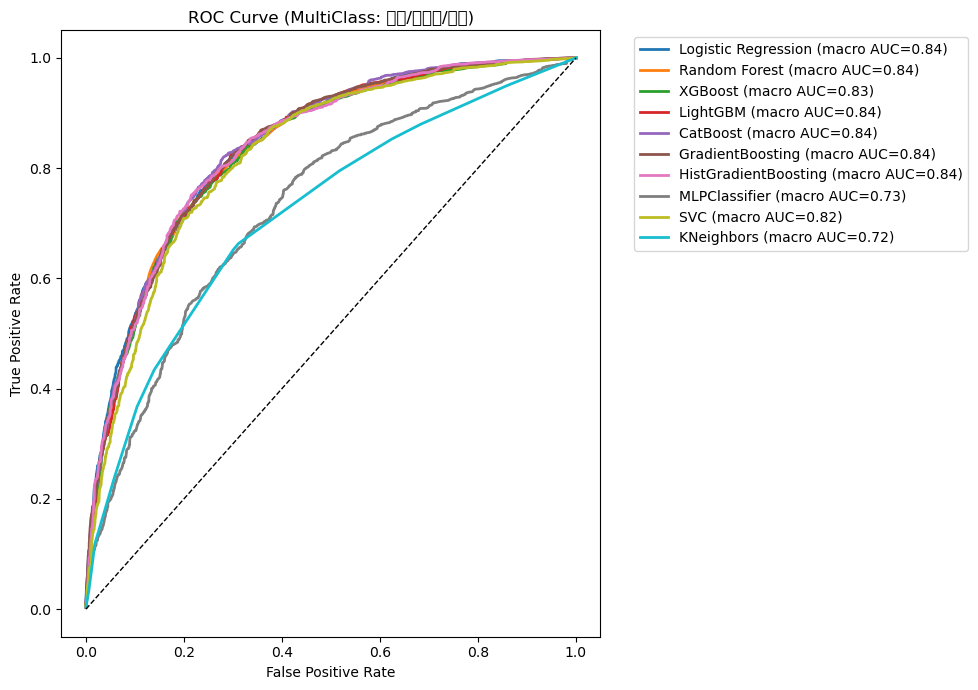

[LightGBM] [Info] Number of positive: 3047, number of negative: 5015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 116
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377946 -> initscore=-0.498276
[LightGBM] [Info] Start training from score -0.498276


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/_s/3rndymjx4pv6gq6z87t71r200000gn/T/ipykernel_66259/1819191799.py:46: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
/var/folders/_s/3rndymjx4pv6gq6z87t71r200000gn/T/ipykernel_66259/1819191799.py:46: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
/var/folders/_s/3rndymjx4pv6gq6z87t71r200000gn/T/ipykernel_66259/1819191799.py:46: UserWarning

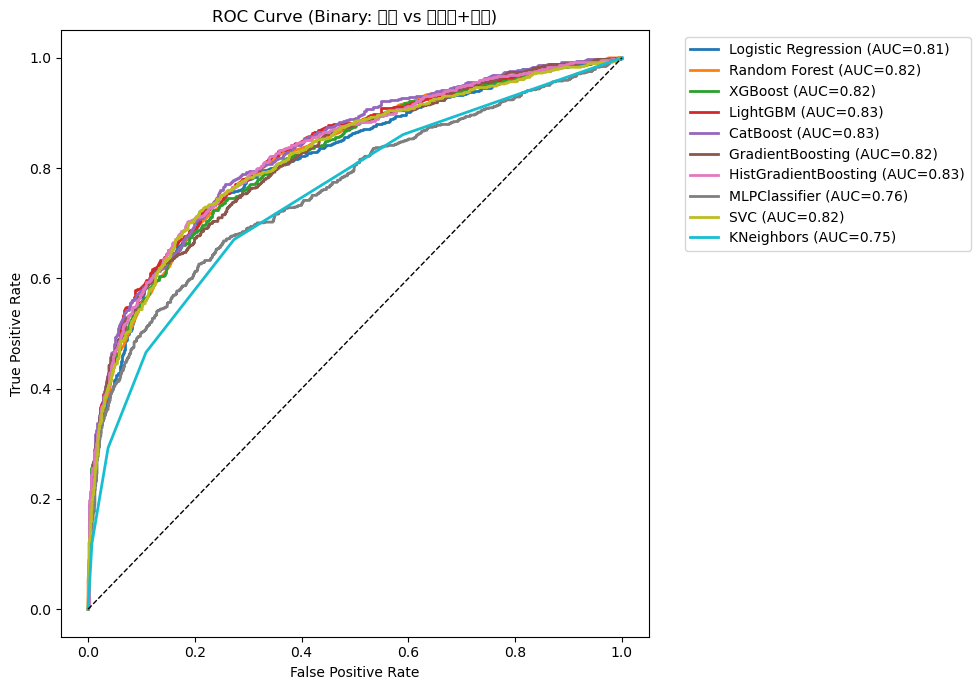

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_multiclass_roc(X_train, X_test, y_train, y_test, models, title, save_path):
    plt.figure(figsize=(10,7))

    n_classes = len(np.unique(y_test))
    # 바이너리라면 두 번째 클래스의 label_binarize는 (N, 1) shape
    y_test_bin = label_binarize(y_test, classes=range(n_classes))

    for name, model in models.items():
        model.fit(X_train, y_train)
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:
            y_score = model.decision_function(X_test)
            if y_score.ndim == 1:
                y_score = np.vstack([1-y_score, y_score]).T

        if n_classes == 2:  # 이진분류 (macro curve 불필요, 1개 ROC만)
            fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])  # 보통 class 1의 확률
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc_score:.2f})")
        else:  # 멀티클래스 (macro curve)
            fpr, tpr, roc_auc = dict(), dict(), dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
            # macro-average curve
            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(n_classes):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
            mean_tpr /= n_classes
            macro_auc = auc(all_fpr, mean_tpr)
            plt.plot(all_fpr, mean_tpr, lw=2,
                    label=f"{name} (macro AUC={macro_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# 멀티클래스
plot_multiclass_roc(
    X_train_multi, X_test_multi, y_train_multi, y_test_multi,
    models_base, "ROC Curve (MultiClass: 정상/전노쇠/노쇠)", r"C:\Users\smkim\Desktop\K-Frailty\ROC_MultiClass_AllModels.png"
)

# 이진분류
plot_multiclass_roc(
    X_train_bin, X_test_bin, y_train_bin, y_test_bin,
    models_base_bin, "ROC Curve (Binary: 정상 vs 전노쇠+노쇠)", r"C:\Users\smkim\Desktop\K-Frailty\ROC_Binary_AllModels.png"
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 116
[LightGBM] [Info] Start training from score -3.003452
[LightGBM] [Info] Start training from score -1.113735
[LightGBM] [Info] Start training from score -0.474728


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

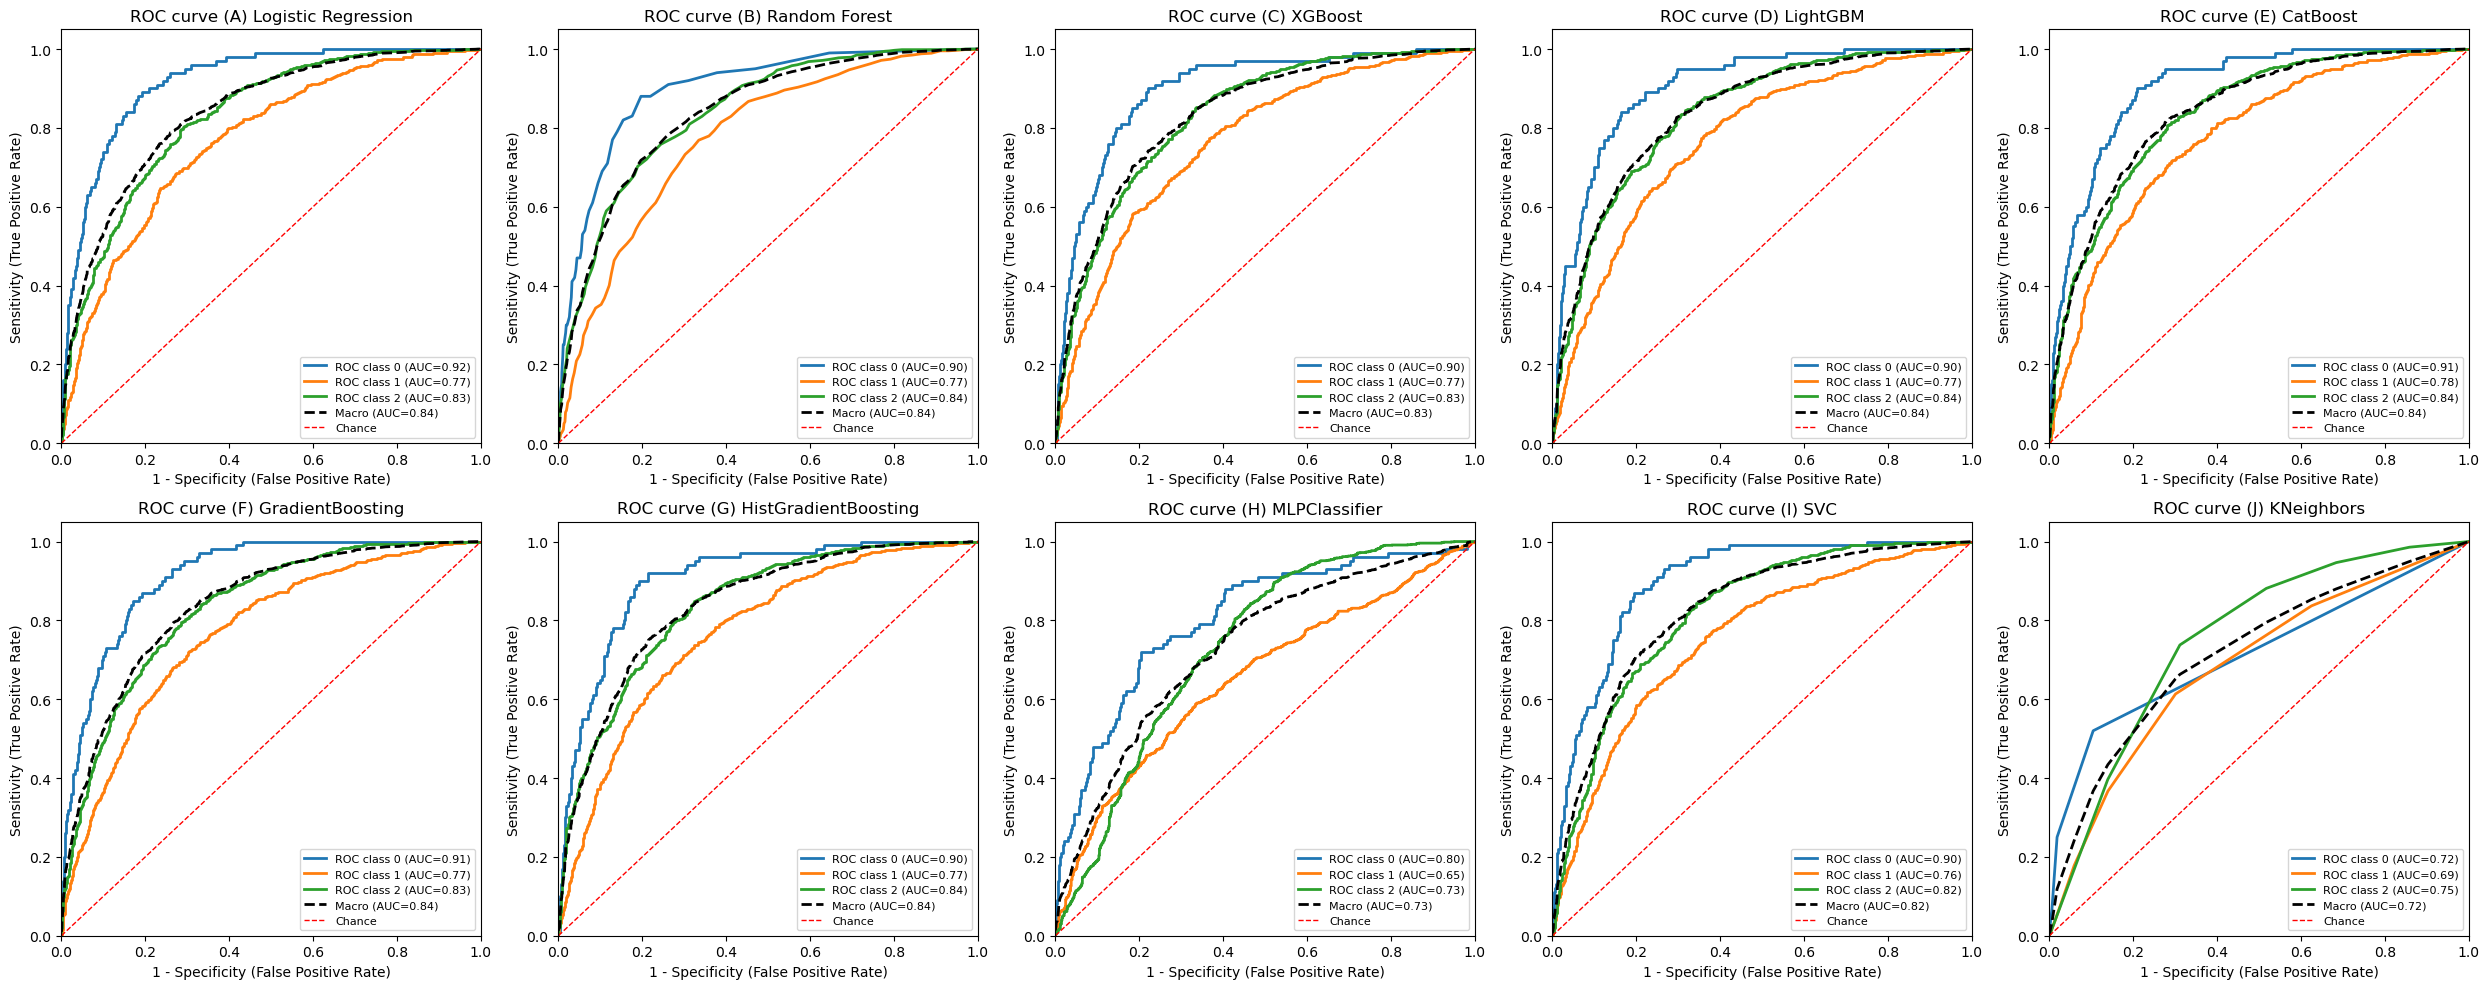

[LightGBM] [Info] Number of positive: 3047, number of negative: 5015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 116
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377946 -> initscore=-0.498276
[LightGBM] [Info] Start training from score -0.498276


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

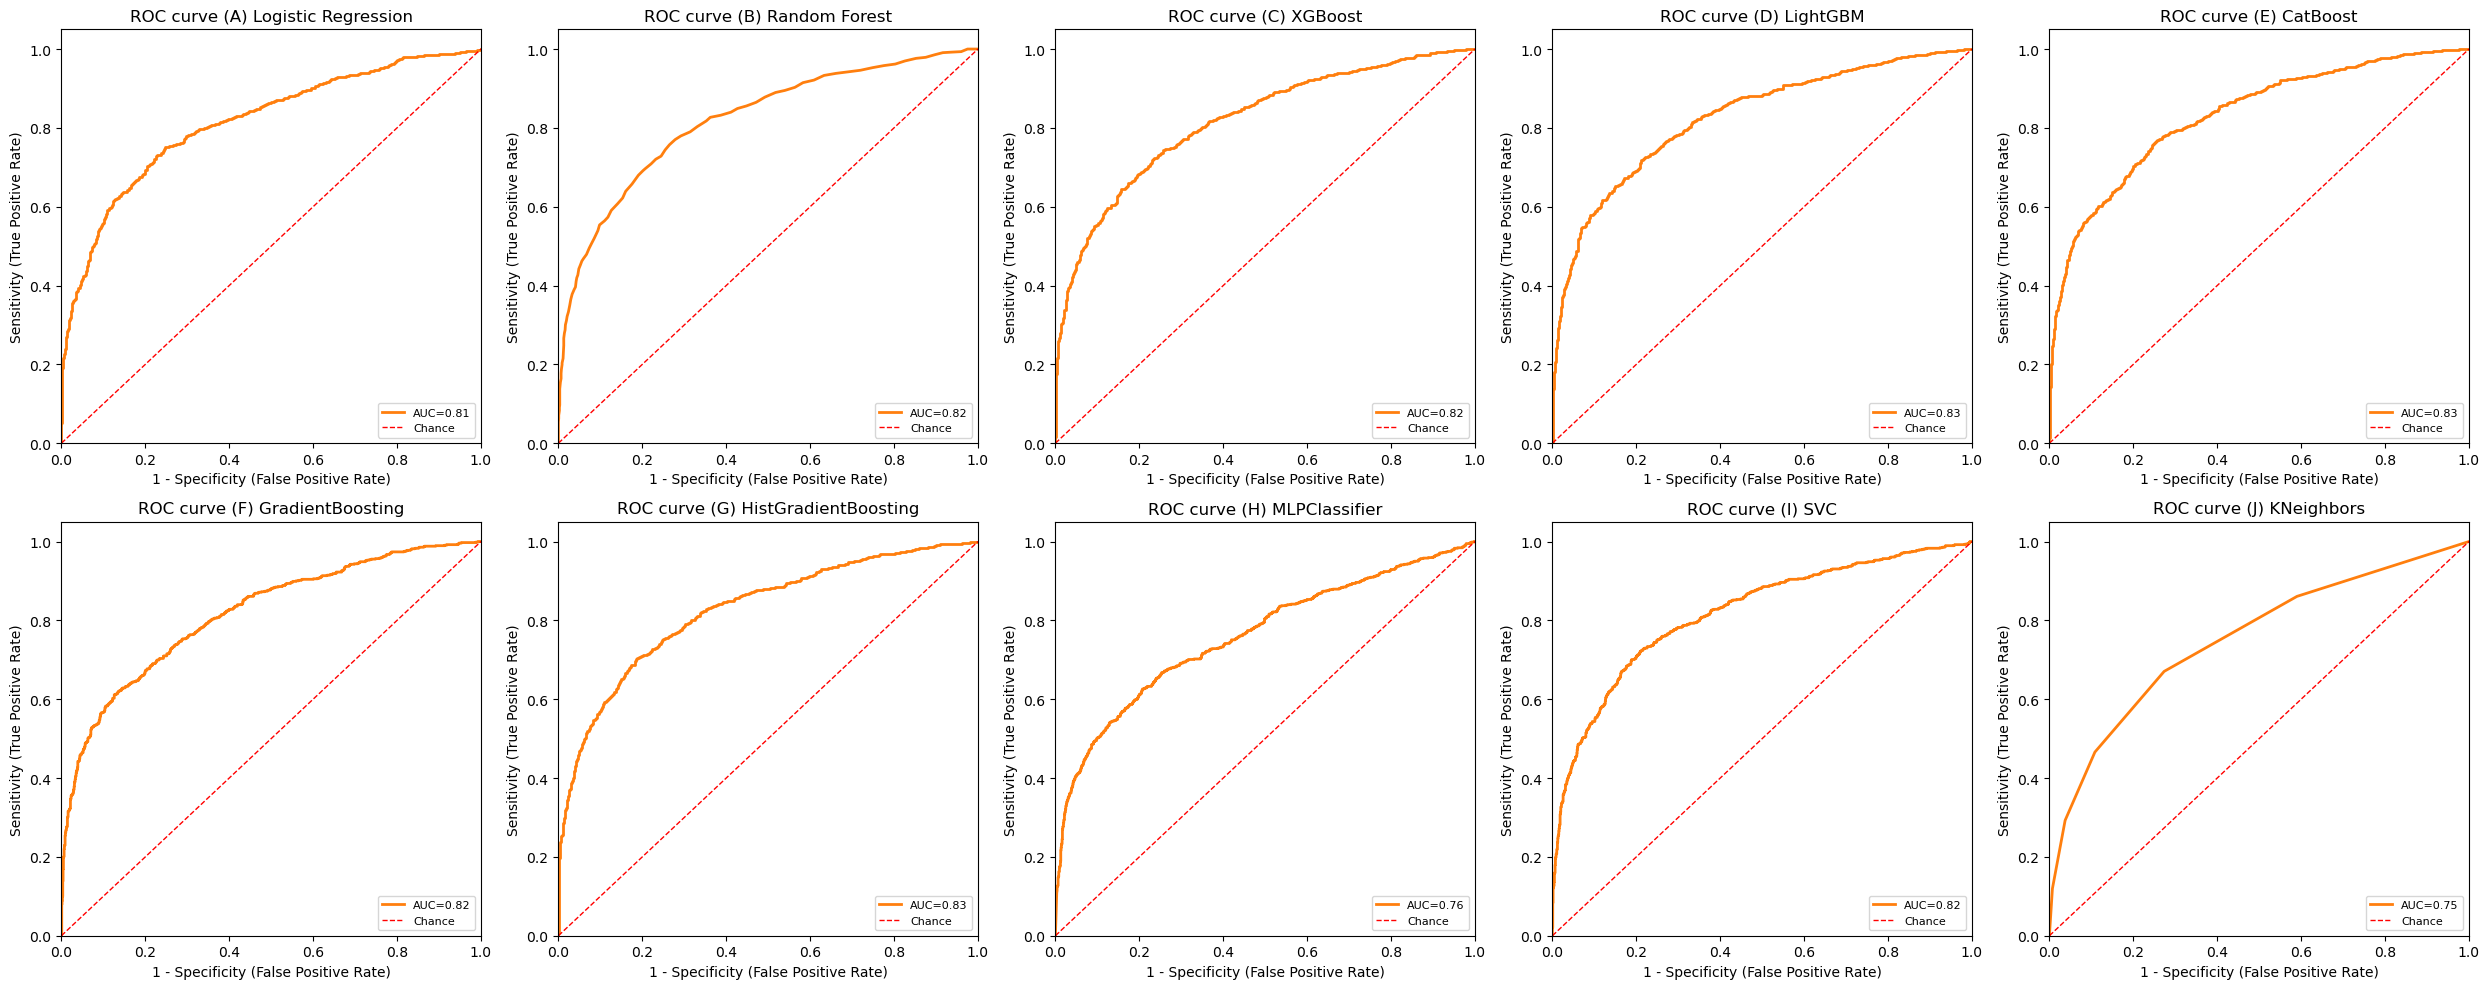

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def plot_multiclass_roc(model, X_train, y_train, X_test, y_test, ax=None, plot_label=''):
    n_classes = len(np.unique(y_test))
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
        if y_score.ndim == 1:
            y_score = np.vstack([1-y_score, y_score]).T

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    colors = plt.colormaps['tab10']

    if n_classes == 2:
        # 이진분류: 단일 ROC만
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])  # class 1
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, color=colors(1), lw=2, label=f"AUC={roc_auc:.2f}")
        ax.plot([0, 1], [0, 1], 'r--', lw=1, label='Chance')
        ax.set_title(f"ROC curve {plot_label}")
        ax.legend(loc="lower right", fontsize=8)
        ax.set_xlabel('1 - Specificity (False Positive Rate)')
        ax.set_ylabel('Sensitivity (True Positive Rate)')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        return ax, [roc_auc], roc_auc

    else:
        auc_list = []
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            auc_list.append(roc_auc)
            ax.plot(fpr, tpr, color=colors(i), lw=2, label=f"ROC class {i} (AUC={roc_auc:.2f})")

        # Macro-average ROC curve
        all_fpr = np.unique(np.concatenate([roc_curve(y_test_bin[:, i], y_score[:, i])[0] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            mean_tpr += np.interp(all_fpr, fpr, tpr)
        mean_tpr /= n_classes
        macro_auc = auc(all_fpr, mean_tpr)
        ax.plot(all_fpr, mean_tpr, color='black', lw=2, linestyle='--', label=f"Macro (AUC={macro_auc:.2f})")

        ax.plot([0, 1], [0, 1], 'r--', lw=1, label='Chance')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('1 - Specificity (False Positive Rate)')
        ax.set_ylabel('Sensitivity (True Positive Rate)')
        ax.set_title(f"ROC curve {plot_label}")
        ax.legend(loc="lower right", fontsize=8)
        return ax, auc_list, macro_auc

# ---- 모델 리스트 분리 ----
# 멀티클래스용 (objective 지정 필요 없음)
model_list_multi = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, eval_metric='mlogloss')),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('HistGradientBoosting', HistGradientBoostingClassifier(random_state=42)),
    ('MLPClassifier', MLPClassifier(max_iter=500, random_state=42)),
    ('SVC', SVC(probability=True, random_state=42)),
    ('KNeighbors', KNeighborsClassifier())
]

# 이진분류용 (XGBoost objective 꼭 명시!)
model_list_bin = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss')),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('HistGradientBoosting', HistGradientBoostingClassifier(random_state=42)),
    ('MLPClassifier', MLPClassifier(max_iter=500, random_state=42)),
    ('SVC', SVC(probability=True, random_state=42)),
    ('KNeighbors', KNeighborsClassifier())
]

# ---- 멀티클래스 ROC subplot ----
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
for idx, (title, model) in enumerate(model_list_multi):
    ax = axs.flat[idx]
    plot_multiclass_roc(model, X_train_multi, y_train_multi, X_test_multi, y_test_multi,
                        ax=ax, plot_label=f"({chr(65+idx)}) {title}")
plt.tight_layout()
plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\ROC_10Models_Subplots_Multi.png", dpi=300, bbox_inches='tight')
plt.show()

# ---- 이진분류 ROC subplot ----
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
for idx, (title, model) in enumerate(model_list_bin):
    ax = axs.flat[idx]
    plot_multiclass_roc(model, X_train_bin, y_train_bin, X_test_bin, y_test_bin,
                        ax=ax, plot_label=f"({chr(65+idx)}) {title}")
plt.tight_layout()
plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\ROC_10Models_Subplots_Binary.png", dpi=300, bbox_inches='tight')
plt.show()


### Confusion Matrix

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 116
[LightGBM] [Info] Start training from score -3.003452
[LightGBM] [Info] Start training from score -1.113735
[LightGBM] [Info] Start training from score -0.474728


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

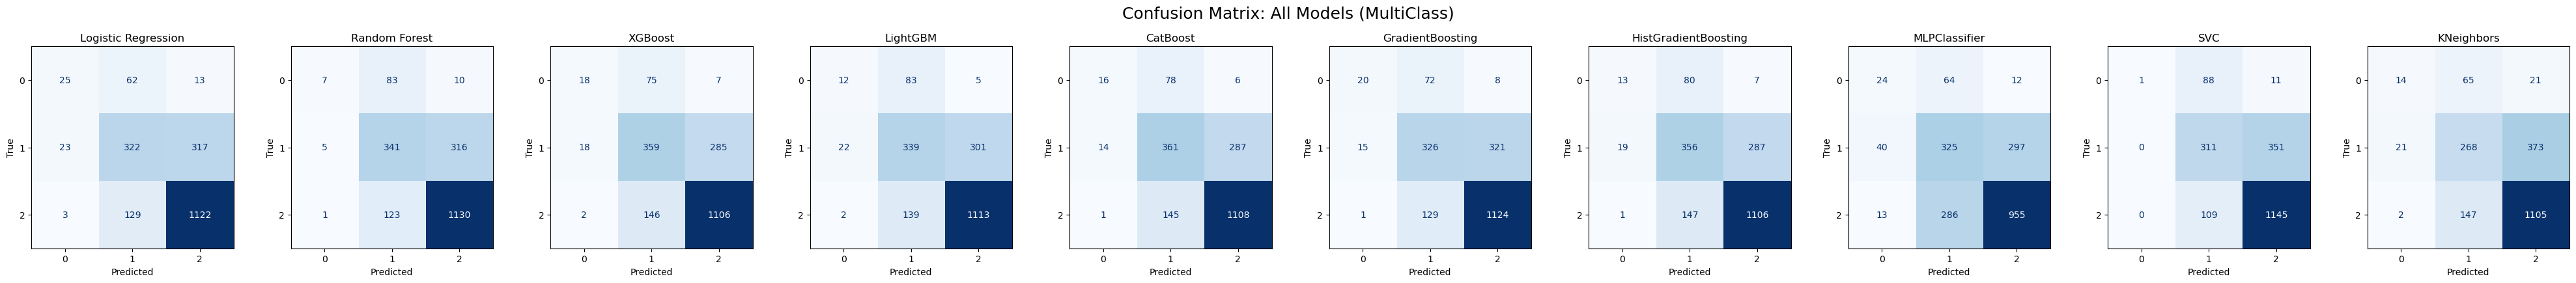

[LightGBM] [Info] Number of positive: 3047, number of negative: 5015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 116
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377946 -> initscore=-0.498276
[LightGBM] [Info] Start training from score -0.498276


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

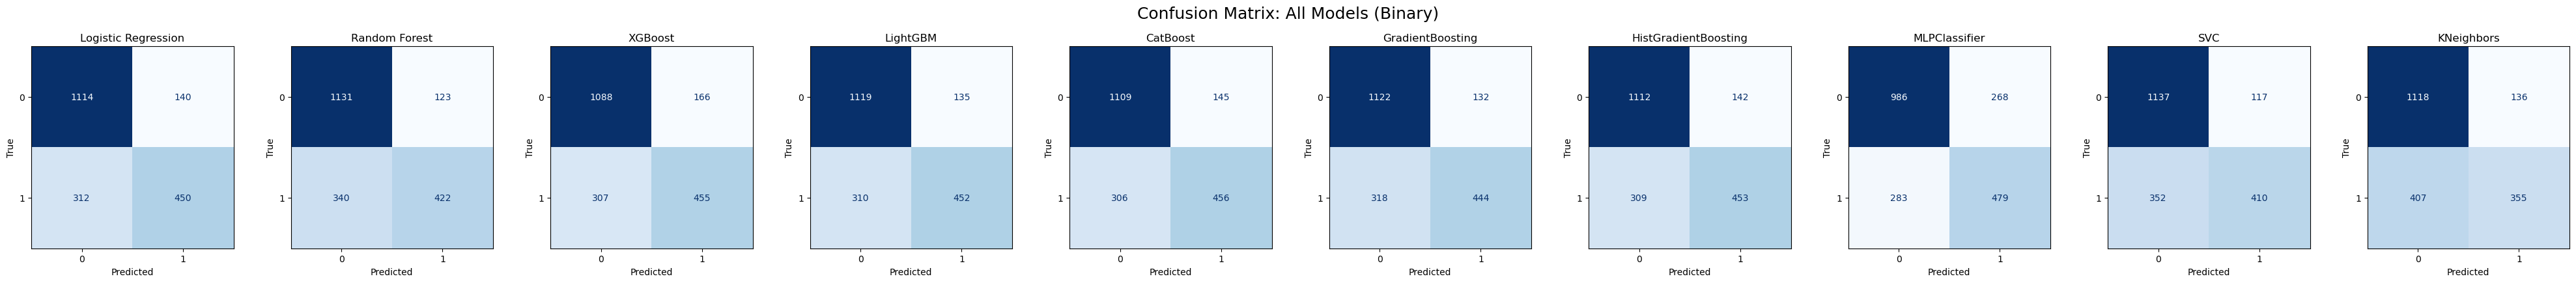

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# 멀티클래스(정상/전노쇠/노쇠)
model_names = list(models_base.keys())
n_models = len(model_names)
n_classes = len(np.unique(y_test_multi))

plt.figure(figsize=(4 * n_models, 4))
for idx, (name, model) in enumerate(models_base.items()):
    model.fit(X_train_multi, y_train_multi)
    y_pred = model.predict(X_test_multi)
    cm = confusion_matrix(y_test_multi, y_pred, labels=range(n_classes))
    plt.subplot(1, n_models, idx + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(n_classes))
    disp.plot(ax=plt.gca(), cmap='Blues', colorbar=False)
    plt.title(name)
    plt.xlabel("Predicted"); plt.ylabel("True")
plt.suptitle("Confusion Matrix: All Models (MultiClass)", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\ConfusionMatrix_10Models_Multi.png", dpi=300, bbox_inches='tight')
plt.show()

# 이진분류(정상 vs 전노쇠+노쇠)
model_names = list(models_base_bin.keys())
n_models = len(model_names)
n_classes = len(np.unique(y_test_bin))

plt.figure(figsize=(4 * n_models, 4))
for idx, (name, model) in enumerate(models_base_bin.items()):
    model.fit(X_train_bin, y_train_bin)
    y_pred = model.predict(X_test_bin)
    cm = confusion_matrix(y_test_bin, y_pred, labels=range(n_classes))
    plt.subplot(1, n_models, idx + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(n_classes))
    disp.plot(ax=plt.gca(), cmap='Blues', colorbar=False)
    plt.title(name)
    plt.xlabel("Predicted"); plt.ylabel("True")
plt.suptitle("Confusion Matrix: All Models (Binary)", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\ConfusionMatrix_10Models_Binary.png", dpi=300, bbox_inches='tight')
plt.show()


### Calibration Plot, accuracy bar plot

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 116
[LightGBM] [Info] Start training from score -3.003452
[LightGBM] [Info] Start training from score -1.113735
[LightGBM] [Info] Start training from score -0.474728


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

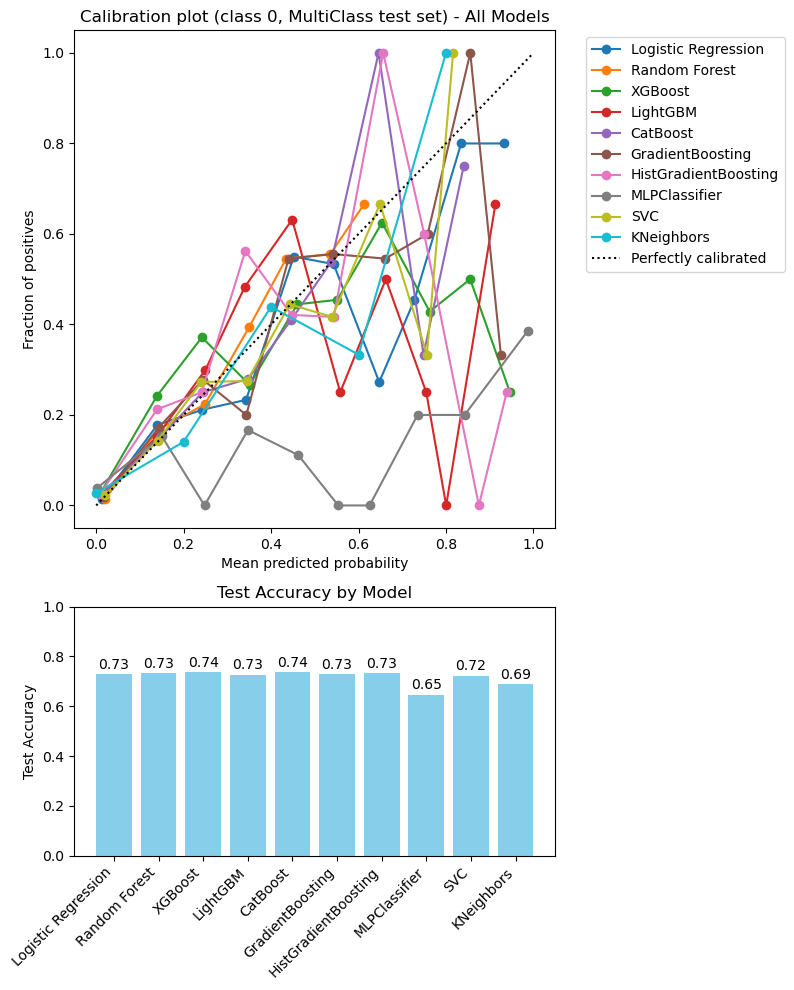

[LightGBM] [Info] Number of positive: 3047, number of negative: 5015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 116
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377946 -> initscore=-0.498276
[LightGBM] [Info] Start training from score -0.498276


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

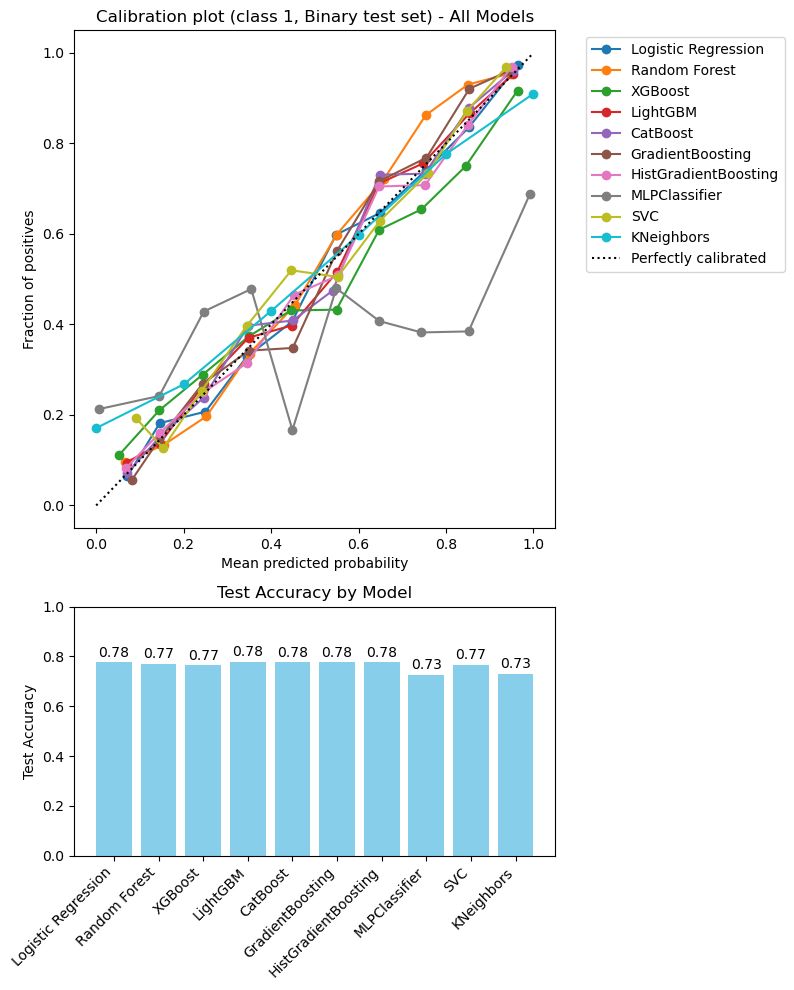

In [10]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score

def plot_calibration_and_accuracy(models, X_train, y_train, X_test, y_test, class_idx=0, title="", save_path=""):
    model_names = []
    accuracies = []
    fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]})

    for name, model in models.items():
        model.fit(X_train, y_train)
        if hasattr(model, "predict_proba"):
            prob = model.predict_proba(X_test)
            prob_class = prob[:, class_idx]
        else:
            continue
        # y_test가 해당 class인지 여부(바이너리라면 y_test==1 등)
        true_bin = (y_test == class_idx).astype(int)
        frac_pos, mean_pred = calibration_curve(true_bin, prob_class, n_bins=10)
        axs[0].plot(mean_pred, frac_pos, marker='o', label=name)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        model_names.append(name)
        accuracies.append(acc)

    axs[0].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    axs[0].set_xlabel("Mean predicted probability")
    axs[0].set_ylabel("Fraction of positives")
    axs[0].set_title(title)
    axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    axs[1].bar(model_names, accuracies, color='skyblue')
    axs[1].set_ylim(0, 1)
    axs[1].set_ylabel("Test Accuracy")
    axs[1].set_title("Test Accuracy by Model")
    for i, v in enumerate(accuracies):
        axs[1].text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
    axs[1].set_xticks(range(len(model_names)))
    axs[1].set_xticklabels(model_names, rotation=45, ha='right')

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# 예시: 멀티클래스에서 robust(0) 기준
plot_calibration_and_accuracy(
    models_base, X_train_multi, y_train_multi, X_test_multi, y_test_multi, class_idx=0,
    title="Calibration plot (class 0, MultiClass test set) - All Models",
    save_path=r"C:\Users\smkim\Desktop\K-Frailty\Calibration_Accuracy_AllModels_Multi.png"
)

# 예시: 이진분류에서는 class 1(전노쇠+노쇠) 기준이 더 직관적
plot_calibration_and_accuracy(
    models_base_bin, X_train_bin, y_train_bin, X_test_bin, y_test_bin, class_idx=1,
    title="Calibration plot (class 1, Binary test set) - All Models",
    save_path=r"C:\Users\smkim\Desktop\K-Frailty\Calibration_Accuracy_AllModels_Binary.png"
)


### 중요 변수 해석(XAI, Feature importance/SHAP/LIME 등)

In [15]:
# 기본값으로 덮어쓰기 (폰트 설정 제거 효과)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = []  # 빈 리스트로 설정하면 기본 폰트 사용

[멀티클래스] SHAP shape: (300, 116, 3)


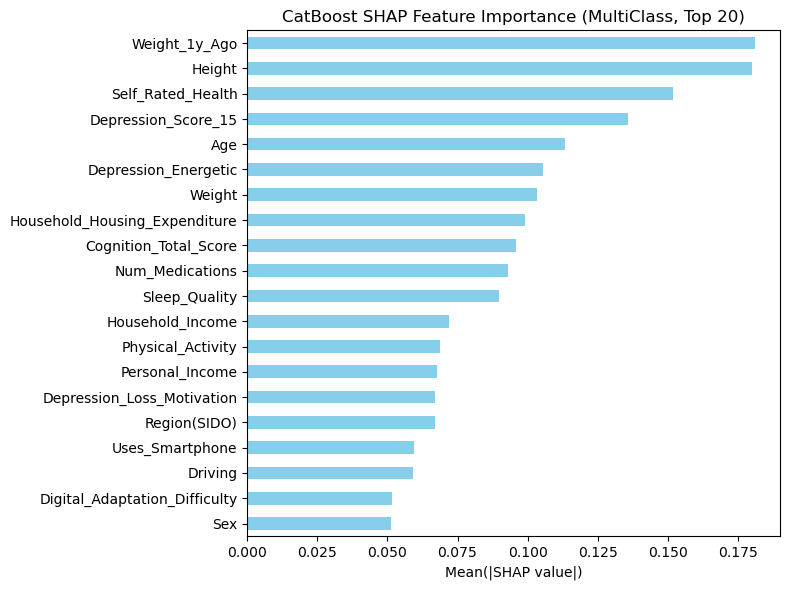

20881

In [16]:
import shap
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import gc

# ---- 설정 ----
save_dir = r"C:\Users\smkim\Desktop\K-Frailty"
os.makedirs(save_dir, exist_ok=True)

# ---- 모델 학습 ----
cat_model_multi = CatBoostClassifier(verbose=0, random_state=42)
cat_model_multi.fit(X_train_multi, y_train_multi)

# ---- SHAP 해석 ----
explainer_multi = shap.TreeExplainer(cat_model_multi)
X_shap_multi = pd.DataFrame(X_train_multi[:300], columns=feature_vars)
shap_values_multi = explainer_multi.shap_values(X_shap_multi)

print("[멀티클래스] SHAP shape:", np.array(shap_values_multi).shape)

# ---- Summary Bar Plot ----
shap.summary_plot(shap_values_multi, X_shap_multi, plot_type="bar", show=False)
plt.savefig(os.path.join(save_dir, "SHAP_CatBoost_bar_multi.png"), dpi=300, bbox_inches='tight')
plt.close()

# ---- Summary Beeswarm Plot ----
shap.summary_plot(shap_values_multi, X_shap_multi, plot_type="dot", show=False)
plt.savefig(os.path.join(save_dir, "SHAP_CatBoost_beeswarm_multi.png"), dpi=300, bbox_inches='tight')
plt.close()

# ---- Top 20 Feature Importance ----
shap_abs_mean_multi = np.abs(shap_values_multi).mean(axis=(0, 2))  # (n_features,)
shap_ranking_multi = pd.Series(shap_abs_mean_multi, index=feature_vars).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
shap_ranking_multi.head(20).plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Mean(|SHAP value|)")
plt.title("CatBoost SHAP Feature Importance (MultiClass, Top 20)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "SHAP_CatBoost_top20_bar_multi.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# ---- 메모리 정리 ----
del cat_model_multi, explainer_multi, shap_values_multi, X_shap_multi
gc.collect()

[바이너리] SHAP shape: (300, 116)


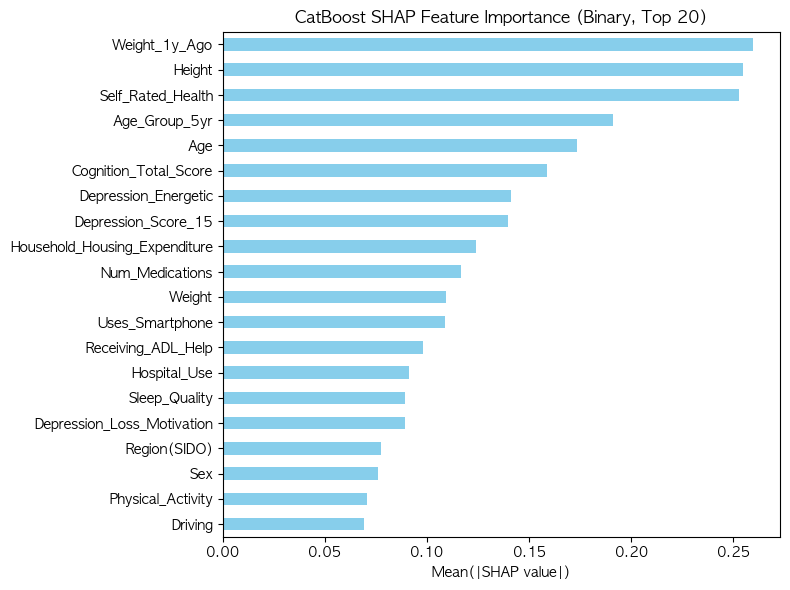

20708

In [17]:
import shap
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import gc

# ---- 폰트 설정 (한글 필요 시) ----
import platform
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 필요한 경우에만

# ---- 저장 경로 설정 ----
save_dir = os.path.join(os.path.expanduser("~"), "Desktop", "K-Frailty")
os.makedirs(save_dir, exist_ok=True)

# ---- 바이너리 SHAP 해석 ----
cat_model_bin = CatBoostClassifier(verbose=0, random_state=42)
cat_model_bin.fit(X_train_bin, y_train_bin)

explainer_bin = shap.TreeExplainer(cat_model_bin)
X_shap_bin = pd.DataFrame(X_train_bin[:300], columns=feature_vars)
shap_values_bin = explainer_bin.shap_values(X_shap_bin)
print("[바이너리] SHAP shape:", np.array(shap_values_bin).shape)

# ---- SHAP Summary bar plot ----
shap.summary_plot(shap_values_bin, X_shap_bin, plot_type="bar", show=False)
plt.savefig(os.path.join(save_dir, "SHAP_CatBoost_bar_bin.png"), dpi=300, bbox_inches='tight')
plt.close()

# ---- SHAP Beeswarm plot ----
shap.summary_plot(shap_values_bin, X_shap_bin, plot_type="dot", show=False)
plt.savefig(os.path.join(save_dir, "SHAP_CatBoost_beeswarm_bin.png"), dpi=300, bbox_inches='tight')
plt.close()

# ---- Top 20 Feature Importance ----
if isinstance(shap_values_bin, list):  # binary classification일 경우 shap_values_bin[1] 사용
    shap_values_bin_plot = shap_values_bin[1]
else:
    shap_values_bin_plot = shap_values_bin

shap_abs_mean_bin = np.abs(shap_values_bin_plot).mean(axis=0)
shap_ranking_bin = pd.Series(shap_abs_mean_bin, index=feature_vars).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
shap_ranking_bin.head(20).plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Mean(|SHAP value|)")
plt.title("CatBoost SHAP Feature Importance (Binary, Top 20)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "SHAP_CatBoost_top20_bar_bin.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# ---- 메모리 정리 ----
del cat_model_bin, explainer_bin, shap_values_bin, X_shap_bin
gc.collect()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

[멀티클래스] SHAP shape: (300, 116, 3)


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

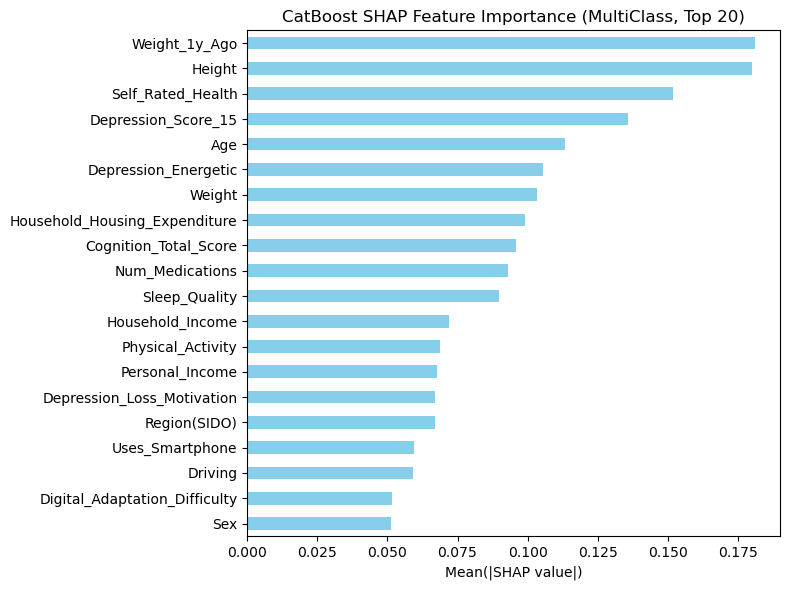

20715

In [11]:
# import shap
# from catboost import CatBoostClassifier
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # ---- 멀티클래스 SHAP 해석 ----
# cat_model_multi = CatBoostClassifier(verbose=0, random_state=42)
# cat_model_multi.fit(X_train_multi, y_train_multi)

# explainer_multi = shap.TreeExplainer(cat_model_multi)
# X_shap_multi = pd.DataFrame(X_train_multi[:300], columns=feature_vars)  # 샘플수 필요시 더 줄이기
# shap_values_multi = explainer_multi.shap_values(X_shap_multi)
# print("[멀티클래스] SHAP shape:", np.array(shap_values_multi).shape)

# # SHAP Summary bar plot
# shap.summary_plot(shap_values_multi, X_shap_multi, plot_type="bar", show=False)
# plt.tight_layout()
# plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\SHAP_CatBoost_bar_multi.png", dpi=300, bbox_inches='tight')
# plt.close('all')

# # Beeswarm plot
# shap.summary_plot(shap_values_multi, X_shap_multi, plot_type="dot", show=False)
# plt.tight_layout()
# plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\SHAP_CatBoost_beeswarm_multi.png", dpi=300, bbox_inches='tight')
# plt.close('all')

# # Top 20 variable importance
# shap_abs_mean_multi = np.abs(shap_values_multi).mean(axis=(0,2))
# shap_ranking_multi = pd.Series(shap_abs_mean_multi, index=feature_vars).sort_values(ascending=False)

# plt.figure(figsize=(8,6))
# shap_ranking_multi.head(20).plot(kind='barh', color='skyblue')
# plt.gca().invert_yaxis()
# plt.xlabel("Mean(|SHAP value|)")
# plt.title("CatBoost SHAP Feature Importance (MultiClass, Top 20)")
# plt.tight_layout()
# plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\SHAP_CatBoost_top20_bar_multi.png", dpi=300, bbox_inches='tight')
# plt.show()
# plt.close('all')

# # 메모리 정리
# del cat_model_multi, explainer_multi, shap_values_multi, X_shap_multi
# import gc
# gc.collect()


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

[바이너리] SHAP shape: (300, 116)


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

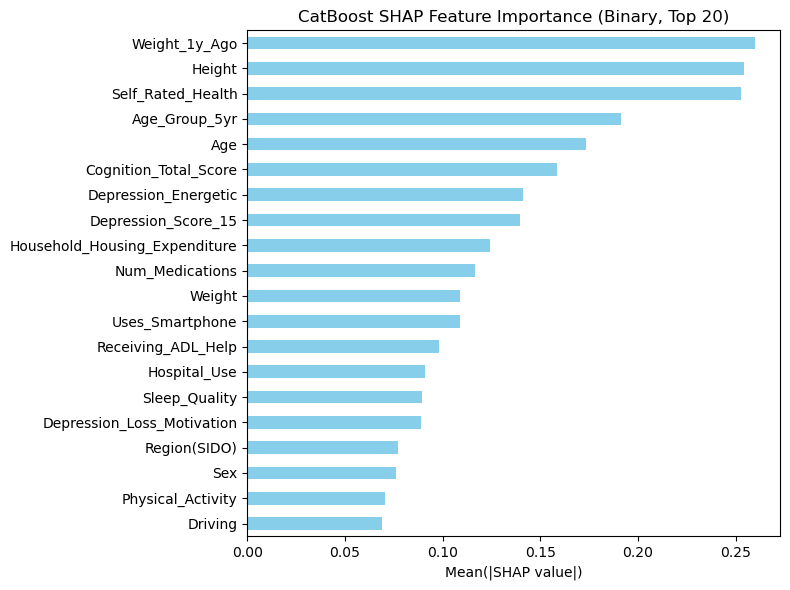

20655

In [12]:
# import shap
# from catboost import CatBoostClassifier
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # ---- 바이너리 SHAP 해석 ----
# cat_model_bin = CatBoostClassifier(verbose=0, random_state=42)
# cat_model_bin.fit(X_train_bin, y_train_bin)

# explainer_bin = shap.TreeExplainer(cat_model_bin)
# X_shap_bin = pd.DataFrame(X_train_bin[:300], columns=feature_vars)  # 샘플수 필요시 더 줄이기
# shap_values_bin = explainer_bin.shap_values(X_shap_bin)
# print("[바이너리] SHAP shape:", np.array(shap_values_bin).shape)

# # SHAP Summary bar plot
# shap.summary_plot(shap_values_bin, X_shap_bin, plot_type="bar", show=False)
# plt.tight_layout()
# plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\SHAP_CatBoost_bar_bin.png", dpi=300, bbox_inches='tight')
# plt.close('all')

# # Beeswarm plot
# shap.summary_plot(shap_values_bin, X_shap_bin, plot_type="dot", show=False)
# plt.tight_layout()
# plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\SHAP_CatBoost_beeswarm_bin.png", dpi=300, bbox_inches='tight')
# plt.close('all')

# # Top 20 variable importance
# if isinstance(shap_values_bin, list):
#     shap_values_bin_plot = shap_values_bin[1]
# else:
#     shap_values_bin_plot = shap_values_bin
# shap_abs_mean_bin = np.abs(shap_values_bin_plot).mean(axis=0)
# shap_ranking_bin = pd.Series(shap_abs_mean_bin, index=feature_vars).sort_values(ascending=False)

# plt.figure(figsize=(8,6))
# shap_ranking_bin.head(20).plot(kind='barh', color='skyblue')
# plt.gca().invert_yaxis()
# plt.xlabel("Mean(|SHAP value|)")
# plt.title("CatBoost SHAP Feature Importance (Binary, Top 20)")
# plt.tight_layout()
# plt.savefig(r"C:\Users\smkim\Desktop\K-Frailty\SHAP_CatBoost_top20_bar_bin.png", dpi=300, bbox_inches='tight')
# plt.show()
# plt.close('all')

# # 메모리 정리
# del cat_model_bin, explainer_bin, shap_values_bin, X_shap_bin
# import gc
# gc.collect()


# 5. 특징 선택 및 모델 경량화

In [ ]:
# import numpy as np
# import pandas as pd
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# # (1) SHAP 기반 변수 중요도 랭킹은 이미 구해졌다고 가정 (shap_ranking: 변수 중요도 Series)

# top_n_list = [5, 10, 20, 30, 50, 80, 100]

# results_multi = []
# results_bin = []

# for top_n in top_n_list:
#     # -------- 멀티클래스 --------
#     selected_features = shap_ranking.head(top_n).index.tolist()
#     X_train_multi_sel = X_train_multi[selected_features]
#     X_test_multi_sel = X_test_multi[selected_features]

#     model_multi = CatBoostClassifier(verbose=0, random_state=42)
#     model_multi.fit(X_train_multi_sel, y_train_multi)
#     y_pred_multi = model_multi.predict(X_test_multi_sel)
#     y_prob_multi = model_multi.predict_proba(X_test_multi_sel)

#     acc_multi = accuracy_score(y_test_multi, y_pred_multi)
#     f1_multi = f1_score(y_test_multi, y_pred_multi, average='weighted')
#     auc_multi = roc_auc_score(y_test_multi, y_prob_multi, multi_class='ovr', average='weighted')

#     results_multi.append([top_n, acc_multi, f1_multi, auc_multi])

#     # -------- 바이너리 --------
#     X_train_bin_sel = X_train_bin[selected_features]
#     X_test_bin_sel = X_test_bin[selected_features]

#     model_bin = CatBoostClassifier(verbose=0, random_state=42)
#     model_bin.fit(X_train_bin_sel, y_train_bin)
#     y_pred_bin = model_bin.predict(X_test_bin_sel)
#     y_prob_bin = model_bin.predict_proba(X_test_bin_sel)[:, 1]

#     acc_bin = accuracy_score(y_test_bin, y_pred_bin)
#     f1_bin = f1_score(y_test_bin, y_pred_bin)
#     auc_bin = roc_auc_score(y_test_bin, y_prob_bin, average='weighted')  # weighted 옵션(이진은 macro=weighted와 동일)

#     results_bin.append([top_n, acc_bin, f1_bin, auc_bin])

# # ----- 결과 DataFrame으로 정리 -----
# df_multi = pd.DataFrame(results_multi, columns=['n_features', 'Test Accuracy', 'F1-score', 'ROC-AUC(weighted)'])
# df_bin = pd.DataFrame(results_bin, columns=['n_features', 'Test Accuracy', 'F1-score', 'ROC-AUC(weighted)'])

# print("\n[멀티클래스 결과]")
# print(df_multi)
# print("\n[바이너리 결과]")
# print(df_bin)

# # ---- 엑셀 저장 (옵션) ----
# with pd.ExcelWriter(r"C:\Users\SM\Desktop\K-Frailty\FeatureSelection_Performance_CatBoost.xlsx") as writer:
#     df_multi.to_excel(writer, index=False, sheet_name='MultiClass')
#     df_bin.to_excel(writer, index=False, sheet_name='Binary')


In [20]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, recall_score,
    precision_score, balanced_accuracy_score, brier_score_loss,
    confusion_matrix
)
import os, subprocess, shutil
from collections import Counter

# ======== 상위 10개 SHAP 변수 지정 ========
# 멀티클래스 Top 20 변수
top20_multi = [
    'Weight_1y_Ago', 'Height', 'Self_Rated_Health', 'Depression_Score_15', 'Age', 
    'Depression_Energetic', 'Weight', 'Household_Housing_Expenditure', 'Cognition_Total_Score',
    'Num_Medications', 'Sleep_Quality', 'Household_Income', 'Physical_Activity', 'Personal_Income',
    'Depression_Loss_Motivation', 'Region(SIDO)', 'Uses_Smartphone', 'Driving', 
    'Digital_Adaptation_Difficulty', 'Sex'
]

# 바이너리 Top 20 변수
top20_binary = [
    'Weight_1y_Ago', 'Height', 'Self_Rated_Health', 'Age_Group_5yr', 'Age', 
    'Cognition_Total_Score', 'Depression_Energetic', 'Depression_Score_15', 'Household_Housing_Expenditure',
    'Num_Medications', 'Weight', 'Uses_Smartphone', 'Receiving_ADL_Help', 'Hospital_Use', 'Sleep_Quality',
    'Depression_Loss_Motivation', 'Region(SIDO)', 'Sex', 'Physical_Activity', 'Driving'
]
# ======== 데이터 불러오기 ========
df_selected = pd.read_excel("Save/data_processed_1.xlsx")
feature_vars = list(set(top10_multi + top10_binary))
X = df_selected[feature_vars]

# 멀티 타겟
y_multi = LabelEncoder().fit_transform(df_selected['Frailty_Group'])

# 바이너리 타겟
binary_map = {'Robust': 0, 'Prefrail': 1, 'Frail': 1}
y_binary = df_selected['Frailty_Group'].map(binary_map)
mask = ~y_binary.isna()
X_bin = X[mask]
y_binary = y_binary[mask].astype(int).values

# ======== 스케일링 ========
scaler = StandardScaler()
X_multi_scaled = pd.DataFrame(scaler.fit_transform(X[top10_multi]), columns=top10_multi)
X_bin_scaled = pd.DataFrame(scaler.fit_transform(X_bin[top10_binary]), columns=top10_binary)

# ======== 모델 정의 ========
models_base = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(max_iter=500, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(),
}
models_base_bin = {
    k: (XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss') if k == 'XGBoost' else v)
    for k, v in models_base.items()
}

# ======== 성능 평가 함수 ========
def get_results_full(models, X_train, X_test, y_train, y_test):
    results = []
    n_class = len(np.unique(y_train))
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
        acc = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        auc, brier = None, None
        try:
            if n_class == 2:
                auc = roc_auc_score(y_test, y_prob[:,1]) if y_prob is not None else None
                brier = brier_score_loss(y_test, y_prob[:,1]) if y_prob is not None else None
            else:
                auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro') if y_prob is not None else None
                brier = np.mean([
                    brier_score_loss((y_test == i).astype(int), y_prob[:, i])
                    for i in range(y_prob.shape[1])
                ]) if y_prob is not None else None
        except Exception as e:
            print(f"{name} AUC/Brier 오류: {e}")

        # Specificity
        try:
            cm = confusion_matrix(y_test, y_pred)
            specificity_per_class = []
            for i in range(len(cm)):
                tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
                fp = cm[:, i].sum() - cm[i, i]
                specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
                specificity_per_class.append(specificity)
            specificity = np.mean(specificity_per_class)
        except:
            specificity = None
        results.append([
            name, f"{balanced_acc:.3f}", f"{sensitivity:.3f}",
            f"{specificity:.3f}" if specificity else "NA", f"{acc:.3f}",
            f"{precision:.3f}", f"{f1:.3f}",
            f"{brier:.3f}" if brier is not None else "NA", f"{auc:.3f}" if auc is not None else "NA"
        ])
    return pd.DataFrame(results, columns=[
        'Model', 'Balanced Accuracy', 'Sensitivity', 'Specificity', 'Accuracy',
        'Precision', 'F1-score', 'Brier Score', 'ROC-AUC'
    ])

# ======== 평가 수행 ========
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi_scaled, y_multi, test_size=0.2, random_state=42, stratify=y_multi)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bin_scaled, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

table_multi_top10 = get_results_full(models_base, X_train_m, X_test_m, y_train_m, y_test_m)
table_binary_top10 = get_results_full(models_base_bin, X_train_b, X_test_b, y_train_b, y_test_b)

print("===== 멀티클래스 (SHAP Top10 변수) 예측 결과 =====")
print(table_multi_top10)
print("\n===== 바이너리 (SHAP Top10 변수) 예측 결과 =====")
print(table_binary_top10)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 10
[LightGBM] [Info] Start training from score -3.003452
[LightGBM] [Info] Start training from score -1.113735
[LightGBM] [Info] Start training from score -0.474728
[LightGBM] [Info] Number of positive: 3047, number of negative: 5015
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 8062, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377946 -> initscore=-0.498276
[LightGBM] [Info] Start training from score -0.4982

In [14]:
# -----------------자동 저장 (로컬 + GitHub) + Git push -----------------
import os
import shutil
import re
from datetime import datetime

notebook_filename = __import__("os").path.basename(__import__("ipynbname").path())
now = datetime.now()
date_str = now.strftime('%y%m%d')
time_str = now.strftime('%H%M')
base_name = f"Data_{date_str}"
num_str = ""
# 저장 경로 설정
#맥#
local_save = "/Users/smkim/Desktop/K-Frailty/Save"
#재택#
#local_save = os.path.join("C:\\Users\\SM\\Desktop\\K-Frailty", "Save")  # 로컬
#병원# 
# local_save = os.path.join("C:\\Users\\View\\Desktop\\K-Frailty", "Save")  # 로컬
github_save = "Save"  # 깃허브 추적 폴더

# 번호 자동 증가 함수
def get_next_num(path):
    existing = [f for f in os.listdir(path) if f.startswith(base_name) and f.endswith(".ipynb")]
    nums = [int(re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f).group(1))
            for f in existing if re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f)]
    return f"{(max(nums) + 1) if nums else 1:05}"

# ---------- 로컬 저장 ----------
num_str = get_next_num(local_save)
new_filename = f"{base_name}_{num_str}_{time_str}.ipynb"
os.makedirs(local_save, exist_ok=True)

if os.path.exists(notebook_filename):
    local_path = os.path.join(local_save, new_filename)
    shutil.copy2(notebook_filename, local_path)
    print(f"✅ 로컬 저장 완료: {local_path}")
else:
    print(f"❌ 로컬 저장 실패: 파일을 찾을 수 없습니다: {notebook_filename}")

# ---------- GitHub 저장 ----------
os.makedirs(github_save, exist_ok=True)  # 이 줄 추가
num_str_git = get_next_num(github_save)
new_filename_git = f"{base_name}_{num_str_git}_{time_str}.ipynb"
if os.path.exists(notebook_filename):
    github_path = os.path.join(github_save, new_filename_git)
    shutil.copy2(notebook_filename, github_path)
    print(f"✅ GitHub용 저장 완료: {github_path}")

    # Git 반영
    subprocess.run(["git", "add", "Save/"])
    subprocess.run(["git", "commit", "-m", f"Backup: {new_filename_git}"])
    subprocess.run(["git", "push", "origin", "main"])
else:
    print(f"❌ GitHub 저장 실패: 파일을 찾을 수 없습니다: {notebook_filename}")

# # 알림 코드
# from plyer import notification
# notification.notify(title='저장 완료', message='코드 저장 완료!', app_name='Jupyter Notebook')
# print('\a')

✅ 로컬 저장 완료: /Users/smkim/Desktop/K-Frailty/Save/Data_250808_00003_0206.ipynb
✅ GitHub용 저장 완료: Save/Data_250808_00004_0206.ipynb
[main 2099e7c] Backup: Data_250808_00004_0206.ipynb
 Committer: Seung Mi Kim <smkim@Seungui-MacBookPro.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 2 files changed, 51864 insertions(+)
 create mode 100644 Save/Data_250808_00003_0206.ipynb
 create mode 100644 Save/Data_250808_00004_0206.ipynb


fatal: could not read Username for 'https://github.com': Device not configured


In [7]:
!pip install ipynbname

  Using cached ipynbname-2024.1.0.0-py3-none-any.whl.metadata (1.9 kB)


# 끝_

# 역학 코드

# 3. 스크리닝
## 1) 노쇠군(정상/전노쇠/노쇠) 간의 변수 차이 분석

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

group_age = '나이(5세 기준)'
group_frail = 'Frailty_Group'
num_vars = ['나이', '현재 키', '몸무게', '우울증 점수', '인지기능 점수_총점', 'ADL 점수', 'IADL 점수', '의사진단 만성질환 총 수', '복용 약물 수',
    '본인 총수입', '가구 총수입', '가구 소비지출', '가구 주거비']

rows = []
for age, gdf in df.groupby(group_age):
    pvals = {}
    for var in num_vars:
        vals = [
            pd.to_numeric(gdf.loc[gdf[group_frail]==g, var], errors='coerce').dropna()
            for g in ['정상','전노쇠','노쇠']
        ]
        if all(len(x)>1 for x in vals):
            pval = f"{f_oneway(*vals)[1]:.3f}" + ('*' if f_oneway(*vals)[1]<0.05 else '')
        else:
            pval = ''
        pvals[var] = pval

    for i, fg in enumerate(['정상','전노쇠','노쇠']):
        row = {'나이(5세 기준)': age, '노쇠군': fg}
        for var in num_vars:
            sub = pd.to_numeric(gdf[gdf[group_frail]==fg][var], errors='coerce').dropna()
            row[f"{var} (mean±SD)"] = f"{sub.mean():.2f}±{sub.std():.2f}"
            if i == 0:
                row[f"{var} p-value"] = pvals[var]
            else:
                row[f"{var} p-value"] = ''
        rows.append(row)

result = pd.DataFrame(rows)
print(result)
result.to_excel(r'C:\Users\SM\Desktop\anova_frailty_group.xlsx', index=False)


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

group_age = '나이(5세 기준)'
group_frail = 'Frailty_Group'
cat_vars = cat_vars = ['성별', '혼인상태', '교육수준', '취업여부', '경제활동 여부', '거주형태', '주거 만족도', '교통수단', '운전 여부', '지역', '시도', '가구 형태', '연가구소득', '가구원수', '가구주와의 관계', '중위소득 대비', '고혈압', '뇌졸중(중풍, 뇌경색)', '고지혈증', '협심증', '심근경색증', '기타 심장질환(심부전증과 부정맥)', '당뇨병', '갑상선 질환', '골관절염(퇴행성관절염), 류머티즘 관절염', '골다공증', '요통', '골절 및 사고 후유증', '만성폐질환(만성기관지염, 폐기종)', '천식', '결핵', '우울증 진단 여부', '치매', '파킨슨병', '불면증', '백내장', '녹내장', '만성중이염', '노인성 난청', '피부질환', '암(악성신생물)', '위십이지장궤양', '간염', '간경변증', '만성 신장 질환', '전립선 비대증', '요실금', '빈혈', '기타 만성질환', '5개 이상 만성질환 여부', '기능상태', '몸무게 변화 여부(1년간)', '우울_생활 만족', '우울_의욕저하', '우울_헛된 느낌', '우울_지루함', '우울_상쾌함', '우울_불안함', '우울_즐거움', '우울_절망감', '우울_외출 기피', '우울_기억력 저하', '우울_삶의 즐거움', '우울_쓸모없음', '우울_기력 좋음', '우울_희망 없음', '우울_자기비하', '자살생각', '인지기능 저하 여부', '현재 흡연', '음주 빈도', '운동 여부', '영양_음식조절', '영양_하루2끼미만', '영양_과음', '영양_혼자 식사', '영양_약 복용 다수', '영양_체중변화', '피로', '계단 오르기 어려움', '걷기 어려움', '낙상 경험', 'ADL_옷입기', 'ADL_세수,양치', 'ADL_목욕', 'ADL_식사', 'ADL_기상 및 외출', 'ADL_화장실 사용', 'ADL_배변 조절', 'IADL_몸단장', 'IADL_집안일', 'IADL_식사준비', 'IADL_빨래', 'IADL_약 복용', 'IADL_금전관리', 'IADL_외출', 'IADL_물건구매', 'IADL_전화', 'IADL_교통수단', '일상 도움 여부', '병원 이용 여부', '의료미수진_병원', '의료미수진_치과', '건강검진 여부', '장기요양 신청', '장기요양 등급', '장애 판정 여부', '스마트폰 보유', '컴퓨터 보유', '스마트워치 보유', '스마트폰 사용', '컴퓨터 사용', '스마트워치 사용', '정보화사회 적응 어려움', '기초생활보장 수급 여부']
wide_rows = []
for age, gdf in df.groupby(group_age):
    temp = {'나이(5세 기준)': [], '노쇠군': []}
    # 노쇠군별 행 만들기
    for fg in ['정상', '전노쇠', '노쇠']:
        temp_row = {'나이(5세 기준)': age, '노쇠군': fg}
        for var in cat_vars:
            ct = pd.crosstab(gdf[var], gdf[group_frail])
            # p-value
            if ct.shape[0] > 1 and ct.shape[1] > 1:
                try:
                    pval = chi2_contingency(ct)[1]
                    pval_str = f"{pval:.3f}" + ('*' if pval < 0.05 else '')
                except:
                    pval_str = ''
            else:
                pval_str = ''
            # 범주별 값
            for cat in sorted(ct.index):
                count = ct.loc[cat, fg] if fg in ct.columns else 0
                denom = gdf[gdf[group_frail]==fg].shape[0]
                percent = (count / denom * 100) if denom > 0 else 0
                col = f"{var}_{cat} (N,%)"
                temp_row[col] = f"{count} ({percent:.1f}%)"
            # p-value는 '정상' 행에만 입력
            temp_row[f"{var} p-value"] = pval_str if fg == '정상' else ''
        wide_rows.append(temp_row)

# 정렬 및 저장
result_wide = pd.DataFrame(wide_rows)
result_wide.to_excel(r'C:\Users\SM\Desktop\chisq_frailty_group_wide.xlsx', index=False)
print(result_wide)

## 스크리닝) 모든 나이 그룹에서 한 번이라도 p<0.05인 변수만 남기기

In [ ]:
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
import re

group_age = '나이(5세 기준)'
group_frail = 'Frailty_Group'

num_vars = ['나이', '현재 키', '몸무게', '우울증 점수', '인지기능 점수_총점', 'ADL 점수', 'IADL 점수', '의사진단 만성질환 총 수', '복용 약물 수',
    '본인 총수입', '가구 총수입', '가구 소비지출', '가구 주거비']

cat_vars = ['성별', '혼인상태', '교육수준', '취업여부', '경제활동 여부', '거주형태', '주거 만족도', '교통수단', '운전 여부', '지역', '시도', '가구 형태', '연가구소득', '가구원수', '가구주와의 관계', '중위소득 대비', '고혈압', '뇌졸중(중풍, 뇌경색)', '고지혈증', '협심증', '심근경색증', '기타 심장질환(심부전증과 부정맥)', '당뇨병', '갑상선 질환', '골관절염(퇴행성관절염), 류머티즘 관절염', '골다공증', '요통', '골절 및 사고 후유증', '만성폐질환(만성기관지염, 폐기종)', '천식', '결핵', '우울증 진단 여부', '치매', '파킨슨병', '불면증', '백내장', '녹내장', '만성중이염', '노인성 난청', '피부질환', '암(악성신생물)', '위십이지장궤양', '간염', '간경변증', '만성 신장 질환', '전립선 비대증', '요실금', '빈혈', '기타 만성질환', '5개 이상 만성질환 여부', '기능상태', '몸무게 변화 여부(1년간)', '우울_생활 만족', '우울_의욕저하', '우울_헛된 느낌', '우울_지루함', '우울_상쾌함', '우울_불안함', '우울_즐거움', '우울_절망감', '우울_외출 기피', '우울_기억력 저하', '우울_삶의 즐거움', '우울_쓸모없음', '우울_기력 좋음', '우울_희망 없음', '우울_자기비하', '자살생각', '인지기능 저하 여부', '현재 흡연', '음주 빈도', '운동 여부', '영양_음식조절', '영양_하루2끼미만', '영양_과음', '영양_혼자 식사', '영양_약 복용 다수', '영양_체중변화', '피로', '계단 오르기 어려움', '걷기 어려움', '낙상 경험', 'ADL_옷입기', 'ADL_세수,양치', 'ADL_목욕', 'ADL_식사', 'ADL_기상 및 외출', 'ADL_화장실 사용', 'ADL_배변 조절', 'IADL_몸단장', 'IADL_집안일', 'IADL_식사준비', 'IADL_빨래', 'IADL_약 복용', 'IADL_금전관리', 'IADL_외출', 'IADL_물건구매', 'IADL_전화', 'IADL_교통수단', '일상 도움 여부', '병원 이용 여부', '의료미수진_병원', '의료미수진_치과', '건강검진 여부', '장기요양 신청', '장기요양 등급', '장애 판정 여부', '스마트폰 보유', '컴퓨터 보유', '스마트워치 보유', '스마트폰 사용', '컴퓨터 사용', '스마트워치 사용', '정보화사회 적응 어려움', '기초생활보장 수급 여부']

# ① 명목형 변수: 공백(’ ’)은 모두 NaN으로 처리
for col in cat_vars:
    if df[col].dtype == object:
        df[col] = df[col].replace(' ', pd.NA)

# ----- 연속형 결과 -----
rows = []
for age, gdf in df.groupby(group_age):
    pvals = {}
    for var in num_vars:
        # 숫자형 변환 + 결측제거
        vals = [
            pd.to_numeric(gdf.loc[gdf[group_frail]==g, var], errors='coerce').dropna()
            for g in ['정상', '전노쇠', '노쇠']
        ]
        if all(len(x) > 1 for x in vals):
            pval_float = f_oneway(*vals)[1]
            pval = f"{pval_float:.3f}" + ('*' if pval_float < 0.05 else '')
        else:
            pval_float = None
            pval = ''
        pvals[var] = (pval, pval_float)

    for i, fg in enumerate(['정상', '전노쇠', '노쇠']):
        row = {'나이(5세 기준)': age, '노쇠군': fg}
        for var in num_vars:
            sub = pd.to_numeric(gdf[gdf[group_frail]==fg][var], errors='coerce').dropna()
            row[f"{var} (mean±SD)"] = f"{sub.mean():.2f}±{sub.std():.2f}"
            row[f"{var} p-value"] = pvals[var][0] if i == 0 else ''
        rows.append(row)

anova_df = pd.DataFrame(rows)

# ✅ 연속형: "모든 나이그룹에서 한 번이라도 유의"한 변수만 남기기
sig_num_vars = []
for var in num_vars:
    ps = anova_df.loc[anova_df['노쇠군'] == '정상', f"{var} p-value"].dropna()
    for p in ps:
        m = re.match(r'([\d\.]+)', str(p))
        if m and float(m.group(1)) < 0.05:
            sig_num_vars.append(var)
            break

anova_keep_cols = ['나이(5세 기준)', '노쇠군']
for var in sig_num_vars:
    anova_keep_cols += [f"{var} (mean±SD)", f"{var} p-value"]
anova_sig_df = anova_df[anova_keep_cols]

# ----- 명목형 결과 (wide-form) -----
wide_rows = []
for age, gdf in df.groupby(group_age):
    for fg in ['정상', '전노쇠', '노쇠']:
        temp_row = {'나이(5세 기준)': age, '노쇠군': fg}
        for var in cat_vars:
            ct = pd.crosstab(gdf[var], gdf[group_frail])
            if ct.shape[0] > 1 and ct.shape[1] > 1:
                try:
                    pval_float = chi2_contingency(ct)[1]
                    pval_str = f"{pval_float:.3f}" + ('*' if pval_float < 0.05 else '')
                except:
                    pval_float = None
                    pval_str = ''
            else:
                pval_float = None
                pval_str = ''
            for cat in sorted(ct.index):
                count = ct.loc[cat, fg] if fg in ct.columns else 0
                denom = gdf[gdf[group_frail] == fg].shape[0]
                percent = (count / denom * 100) if denom > 0 else 0
                col = f"{var}_{cat} (N,%)"
                temp_row[col] = f"{count} ({percent:.1f}%)"
            temp_row[f"{var} p-value"] = pval_str if fg == '정상' else ''
        wide_rows.append(temp_row)

chisq_df = pd.DataFrame(wide_rows)

# ✅ 명목형: "모든 나이그룹에서 한 번이라도 유의"한 변수만 남기기
sig_cat_vars = []
for var in cat_vars:
    ps = chisq_df.loc[chisq_df['노쇠군'] == '정상', f"{var} p-value"].dropna()
    for p in ps:
        m = re.match(r'([\d\.]+)', str(p))
        if m and float(m.group(1)) < 0.05:
            sig_cat_vars.append(var)
            break

chisq_keep_cols = ['나이(5세 기준)', '노쇠군']
for var in sig_cat_vars:
    chisq_keep_cols += [col for col in chisq_df.columns if col.startswith(f"{var}_") or col == f"{var} p-value"]

chisq_sig_df = chisq_df[chisq_keep_cols]

# ----- 엑셀 한 파일에 시트로 저장 -----
with pd.ExcelWriter(r'C:\Users\SM\Desktop\frailty_group_significant.xlsx', engine='xlsxwriter') as writer:
    anova_sig_df.to_excel(writer, sheet_name='연속형_유의변수', index=False)
    chisq_sig_df.to_excel(writer, sheet_name='명목형_유의변수', index=False)


# 4. 분석
## 1) 대상자의 특성에 따른 노쇠군 분포
변수: 성별, 연령대, 교육수준, 소득 등

형태: 범주형 변수 → 빈도/비율, 연속형 변수 → 평균(표준편차)

목적: 독자에게 대상자 특성과 frailty 분포를 한눈에 제시

In [22]:
print(df.columns.tolist())

['변수명', '유의미 연령대', 'p-value 범위', '특징/해석']


In [21]:
import pandas as pd

# 엑셀 불러오기 (경로 수정 필요)
df = pd.read_excel(r'C:\Users\SM\Desktop\노쇠군간의 변수 차이_250804.xlsx')

# 분석 대상 변수 리스트 (표 1에 넣을 주요 특성)
group_vars = ['성별', '나이(5세 기준)', '교육수준', '지역']

# 노쇠군 이름 (순서 고정)
frail_groups = ['정상', '전노쇠', '노쇠']

# 결과 저장
result_table1 = []

for var in group_vars:
    # 변수명 삽입
    result_table1.append({'변수': var, '범주': '', '정상 (n,%)': '', '전노쇠 (n,%)': '', '노쇠 (n,%)': '', '합계': ''})

    for cat in df[var].dropna().unique():
        row = {'변수': '', '범주': cat}
        total = len(df[df[var] == cat])
        for fg in frail_groups:
            count = len(df[(df[var] == cat) & (df['Frailty_Group'] == fg)])
            percent = count / total * 100 if total > 0 else 0
            row[f"{fg} (n,%)"] = f"{count} ({percent:.1f}%)"
        row['합계'] = total
        result_table1.append(row)

# DataFrame으로 변환
result_df = pd.DataFrame(result_table1)

# 저장
result_df.to_excel(r'C:\Users\SM\Desktop\table1_frailty_distribution.xlsx', index=False)
print(result_df)


KeyError: '성별'

## 2) 단변량 분석
방법: 범주형은 카이제곱, 연속형은 ANOVA 또는 t-test

결과: p-value 포함, 유의한 변수 식별

목적: 후속 회귀분석용 후보 변수 선별

## 3) 로지스틱 회귀 결과
모델: frailty 유무 또는 3분류 (다항 회귀)

결과: OR, 95% CI, p-value

목적: 독립적인 위험요인 명확화

## 4) 공간 분석

In [28]:
# -----------------자동 저장 (로컬 + GitHub) + Git push -----------------
import os
import shutil
import re
from datetime import datetime

notebook_filename = __import__("os").path.basename(__import__("ipynbname").path())
now = datetime.now()
date_str = now.strftime('%y%m%d')
time_str = now.strftime('%H%M')
base_name = f"Data_{date_str}"
num_str = ""
# 저장 경로 설정
#재택#
# local_save = os.path.join("C:\\Users\\SM\\Desktop\\K-Frailty", "Save")  # 로컬
#병원# 
local_save = os.path.join("C:\\Users\\View\\Desktop\\K-Frailty", "Save")  # 로컬
github_save = "Save"  # 깃허브 추적 폴더

# 번호 자동 증가 함수
def get_next_num(path):
    existing = [f for f in os.listdir(path) if f.startswith(base_name) and f.endswith(".ipynb")]
    nums = [int(re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f).group(1))
            for f in existing if re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f)]
    return f"{(max(nums) + 1) if nums else 1:05}"

# ---------- 로컬 저장 ----------
num_str = get_next_num(local_save)
new_filename = f"{base_name}_{num_str}_{time_str}.ipynb"
os.makedirs(local_save, exist_ok=True)

if os.path.exists(notebook_filename):
    local_path = os.path.join(local_save, new_filename)
    shutil.copy2(notebook_filename, local_path)
    print(f"✅ 로컬 저장 완료: {local_path}")
else:
    print(f"❌ 로컬 저장 실패: 파일을 찾을 수 없습니다: {notebook_filename}")

# ---------- GitHub 저장 ----------
os.makedirs(github_save, exist_ok=True)  # 이 줄 추가
num_str_git = get_next_num(github_save)
new_filename_git = f"{base_name}_{num_str_git}_{time_str}.ipynb"
if os.path.exists(notebook_filename):
    github_path = os.path.join(github_save, new_filename_git)
    shutil.copy2(notebook_filename, github_path)
    print(f"✅ GitHub용 저장 완료: {github_path}")

    # Git 반영
    subprocess.run(["git", "add", "Save/"])
    subprocess.run(["git", "commit", "-m", f"Backup: {new_filename_git}"])
    subprocess.run(["git", "push", "origin", "main"])
else:
    print(f"❌ GitHub 저장 실패: 파일을 찾을 수 없습니다: {notebook_filename}")

# 알림 코드
from plyer import notification
notification.notify(title='저장 완료', message='코드 저장 완료!', app_name='Jupyter Notebook')
print('\a')

✅ 로컬 저장 완료: C:\Users\View\Desktop\K-Frailty\Save\Data_250806_00007_1343.ipynb
✅ GitHub용 저장 완료: Save\Data_250806_00005_1343.ipynb

